# Apply Regression Methods on House Prices Prediction(Part1)

# 1.Overview

This notebook will arm to provide explanations and application of different regression metheds on house sales in King County dataset to predict house prices. As we know, there are many regresion methods, each of them has pros and cons. We will implement all of them and do the comparison on the evaluation results.

The contents of this notebook are as follows:
* Do data cleaning and visualization, apply exploratory data analysis(EDA) to summarize the main characteristics of the dataset.
* Apply simple linear regression, multiple regression, polynomial regression, Ridge regression and LASSO with cross validation to do data modeling, try to find the most useful model
* Finally, aplly KNN, decision tree and random forest.

# 2. Data Preparation

## 2.1 Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [132]:
#sales = graphlab.SFrame('kc_house_data.gl/')
import scipy
import pandas as pd# Pandas is an easy-to-use data structures and data analysis tools
import numpy as np# NumPy is the fundamental package for scientific computing
import seaborn as sns# Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
import csv
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression# Scikit learn library that implements generalized linear models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

%matplotlib notebook

In [133]:
House = pd.read_csv('kc_house_data.csv')
House.shape#21613 x 21
# Columns introduction
# sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
# sqft_lot15: lotSize area in 2015(implies-- some renovations)

(21613, 21)

In [134]:
House.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [135]:
House.info()
#House.isnull().any() # look for the null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [136]:
#House.iloc[1]#print the first row of the dataframe

In [137]:
House.dtypes.index# print the columnnames

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [138]:
House.dtypes.index# print the columnnames

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [139]:
#House = House.drop(['id','date'],axis = 1)#drop two unuseful features

## 2.2 Output Variables(Dependent Variable)

<IPython.core.display.Javascript object>


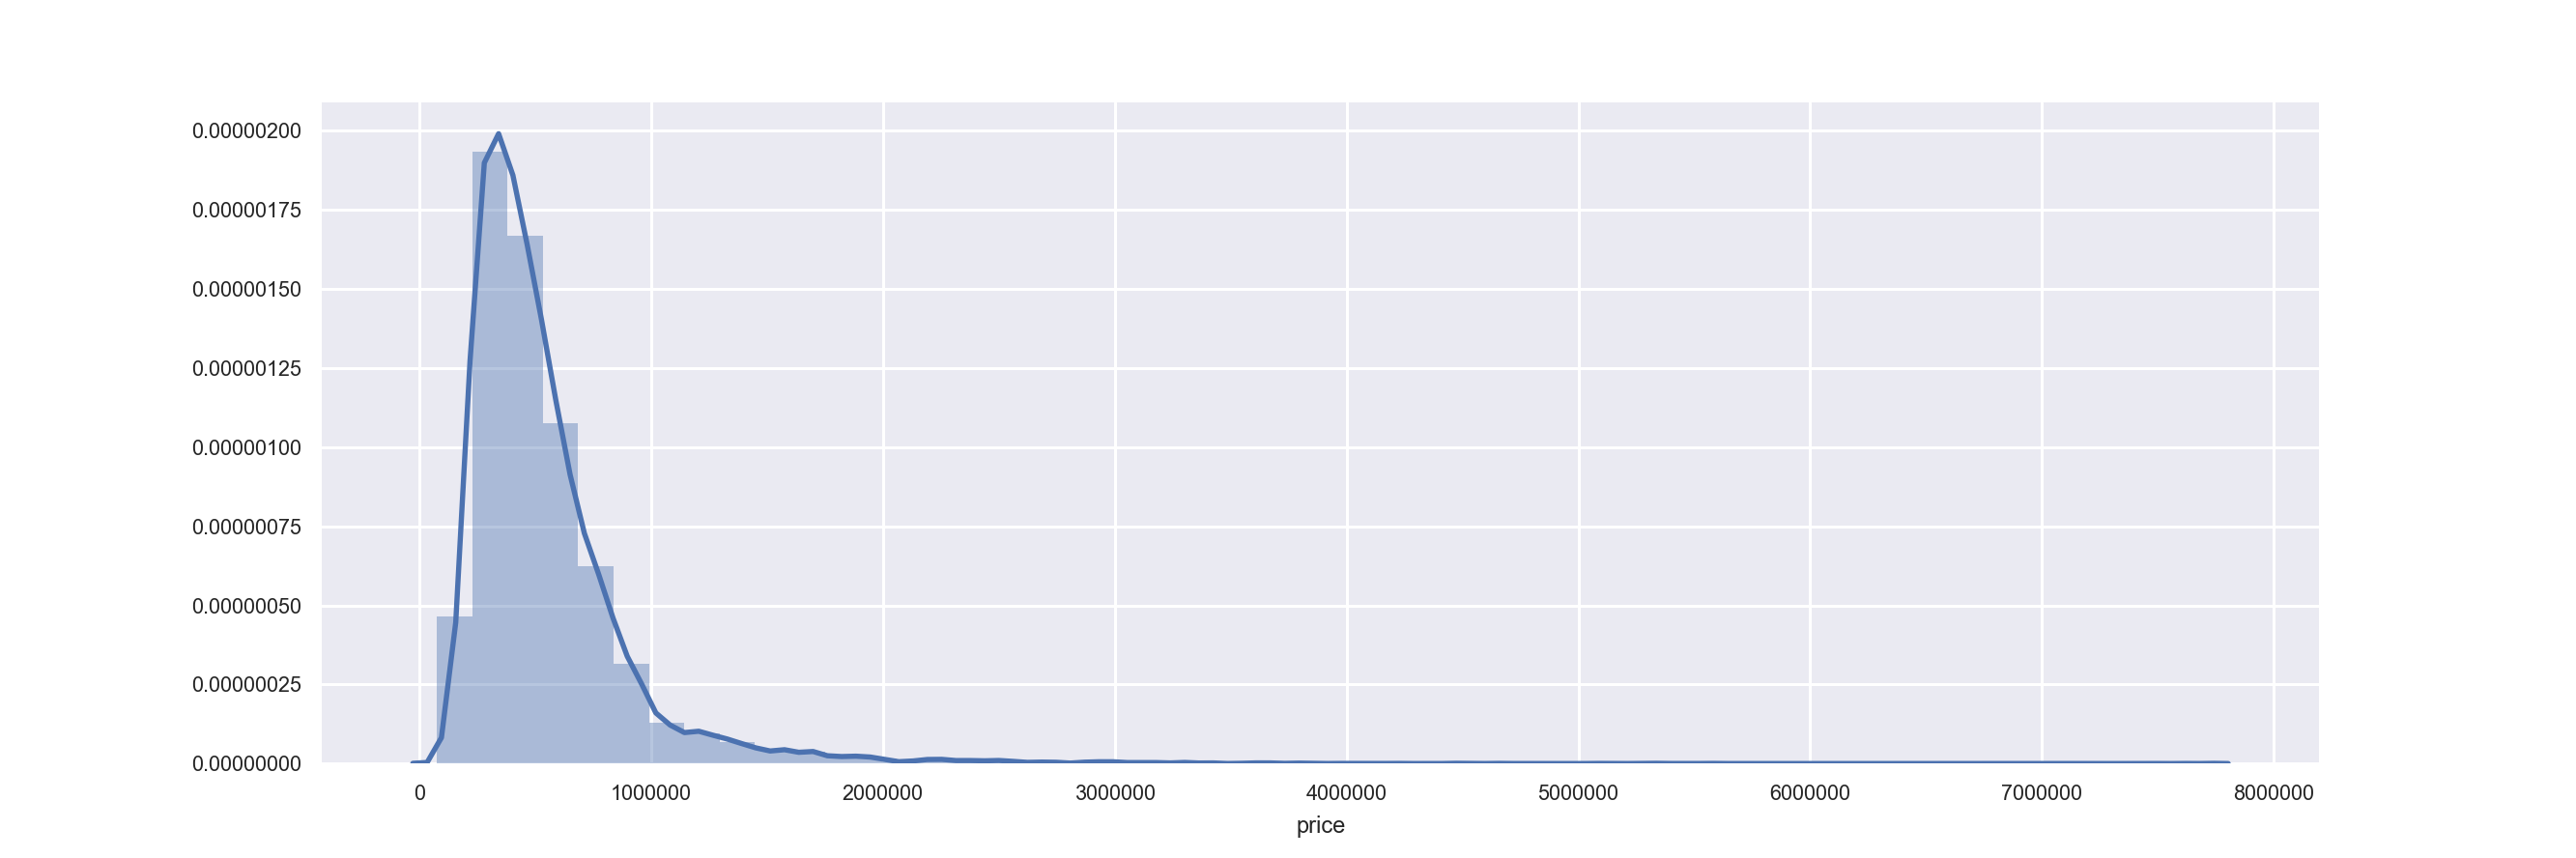

In [140]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(House['price'])
plt.show()

As we all know, the output variable is 'price'. Let's display the distribution of the target variable using a boxplot.

<IPython.core.display.Javascript object>


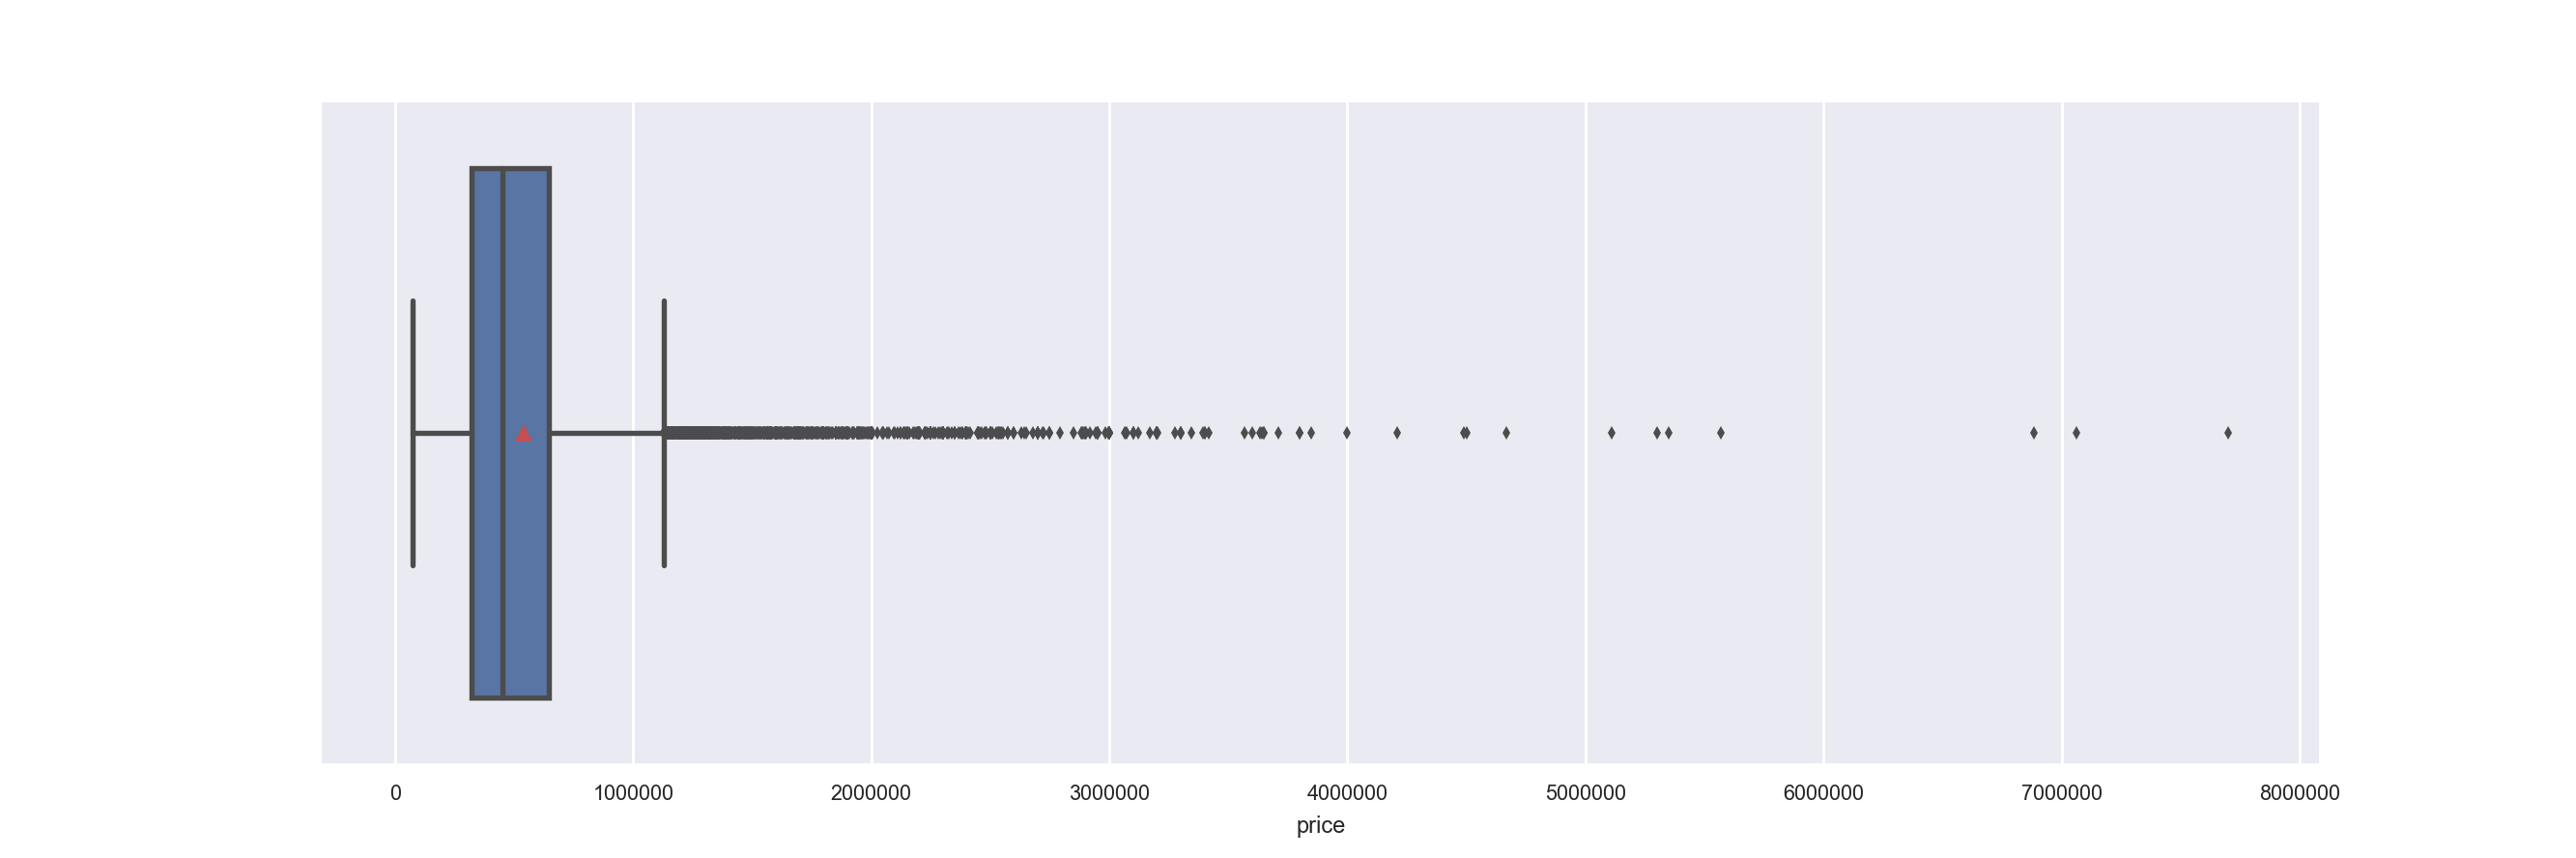

In [141]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = House, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


From the boxplot above, we find there are plenty of outliers which values are larger than Q3(75th percentile)+1.5*IQR(Interquartile range),the right tail is long and the median line is gravitating towards the left of box. It seems the distribution is skewed to the right.

## QQplot on 'price' and log(price)

<IPython.core.display.Javascript object>


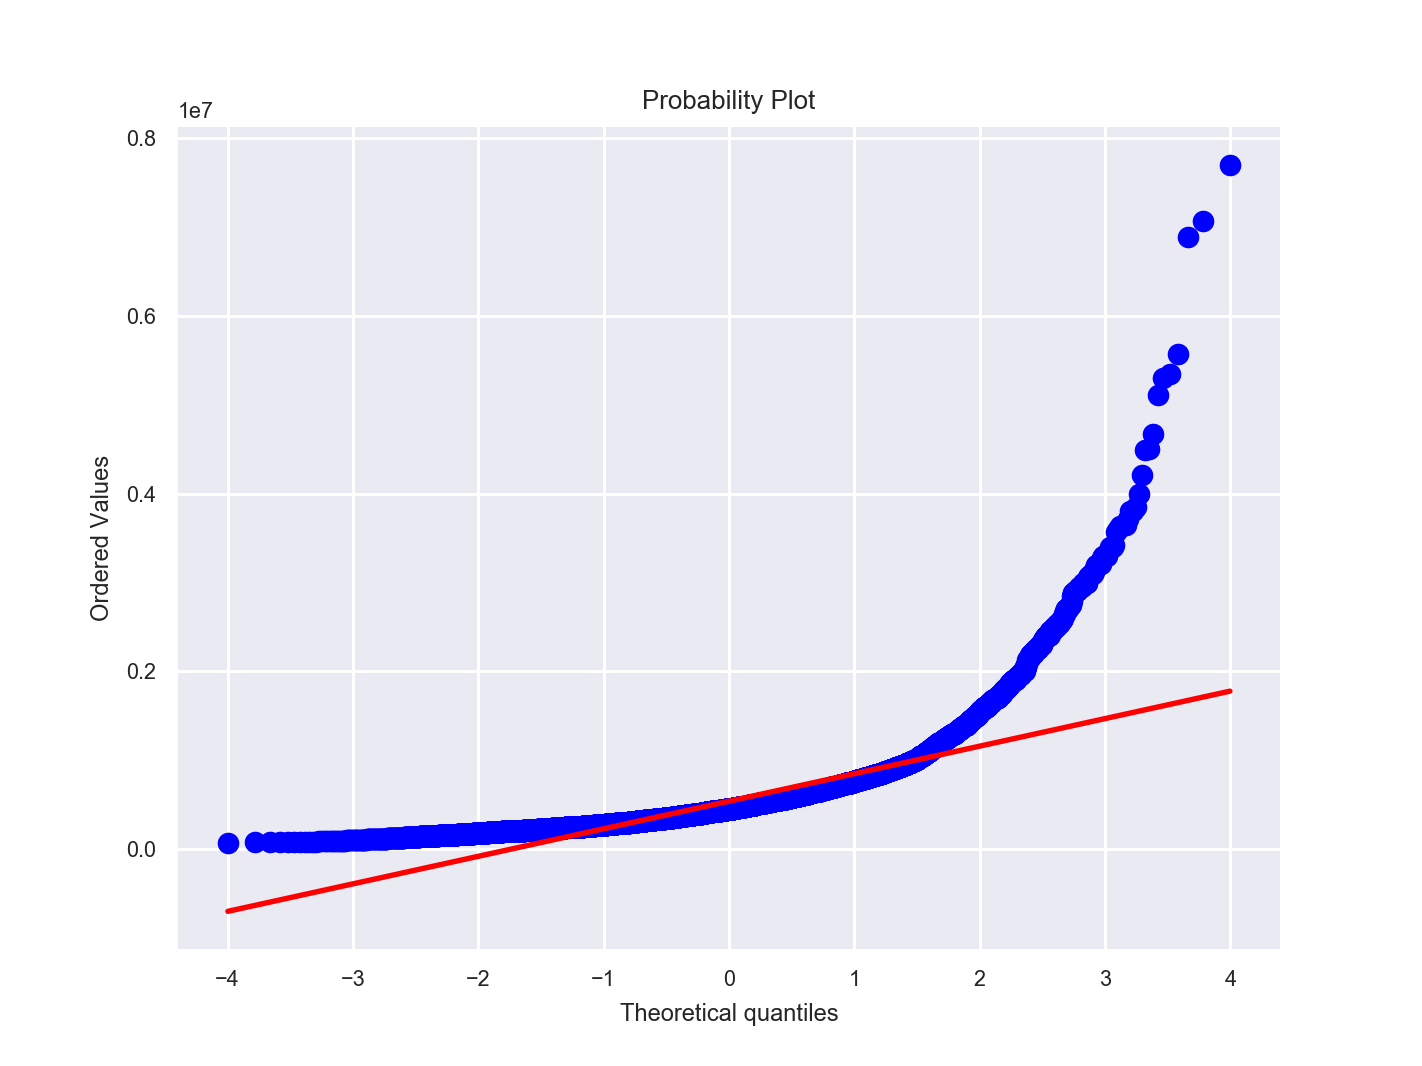

In [142]:
fig = plt.figure()
res = scipy.stats.probplot(House['price'], plot=plt)
plt.show()

QQ plot above reveals a non-normalized distribution of target variable 'price', let's try to use logrithm transform.

<IPython.core.display.Javascript object>


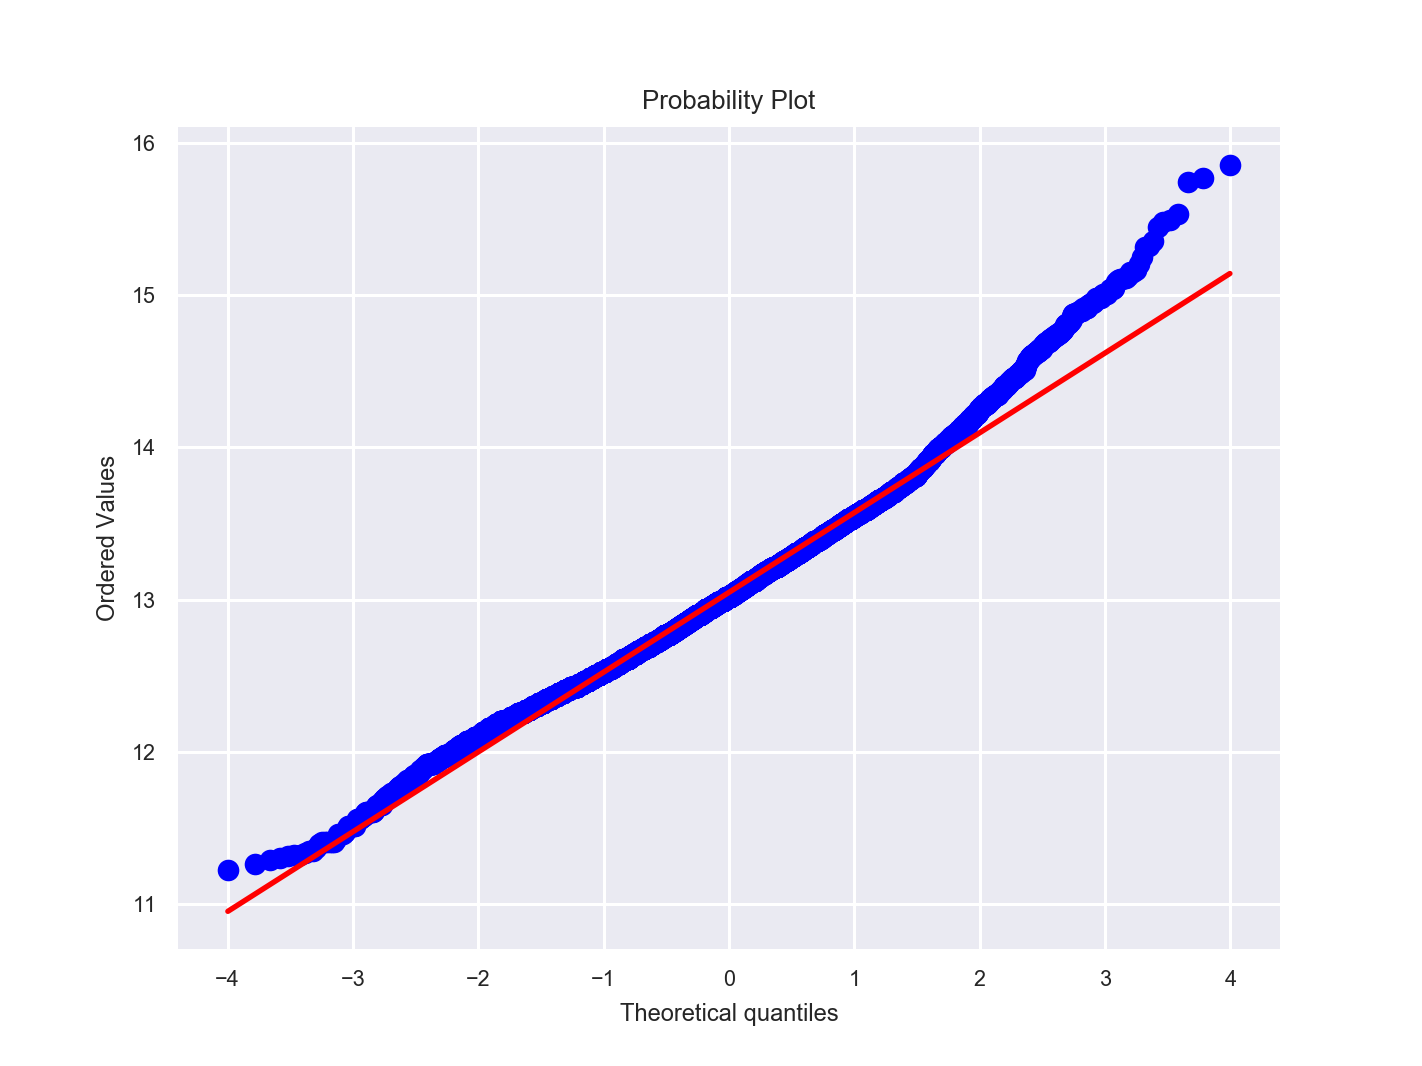

In [143]:
fig = plt.figure()
Log_price = House['price'].apply(lambda x: np.log(x))
res = scipy.stats.probplot(Log_price, plot=plt)
plt.show()

After applying logrithm transform, log(price) follows a normalized distribution. So we plan to use logrithm transform to deal with price in the model

## 2.3 Independent Variables

In [144]:
print(House.dtypes.index)
len(House.dtypes.index)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


21

Firstly, let's see the 'date' variable

In [145]:
House['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

As it is quite hard to use 'date' into regression model, we can transfer it into a numeric variable by calculating the distance between the date and the earliest date in this column:

In [146]:
from datetime import datetime
def ToDateTime(date):
    return datetime.strptime(date[:8],'%Y%m%d').date()
House['date_ToDate'] = House['date'].apply(lambda x: ToDateTime(x))
House['date_min'] = House['date'].apply(lambda x: House['date_ToDate'].min())
House['days_distance'] = abs(House['date_ToDate']-House['date_min'])
print(House['date_min'][0])
House = House.drop(['date_ToDate','date_min'],axis = 1)
# change days_distance from timedelta64 into int
House['days_distance'] = House['days_distance'].dt.days
House.head()

2014-05-02


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view      ...        sqft_above  \
0      5650     1.0           0     0      ...              1180   
1      7242     2.0           0     0      ...              2170   
2     10000     1.0           0     0      ...               770   
3      5000     1.0           0     0      ...              1050   
4      8080     1.0           0     0      ...              1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  days_distance  
0           1340        5650            164  
1           1690        7639            221  
2           2720        8062            299  
3           1360        5000            221  
4           1800        7503            292  

[5 rows x 22 columns]

There are 19 independent vairables considered('id' and 'date' excluded). Firstly, let's think about whether they are numerical or categorical variables and how to treat them in the regression.

In [147]:
House0 = House.drop(['date','id'],axis = 1)
House0['price'] = np.log10(House['price'])
#print(House['price'])
#print(House0['price'])
House0.rename(columns={'price':'log(price)'}, inplace=True)

In [148]:
print(House0.dtypes)
len(House0.dtypes)

log(price)       float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
days_distance      int64
dtype: object


20

<IPython.core.display.Javascript object>


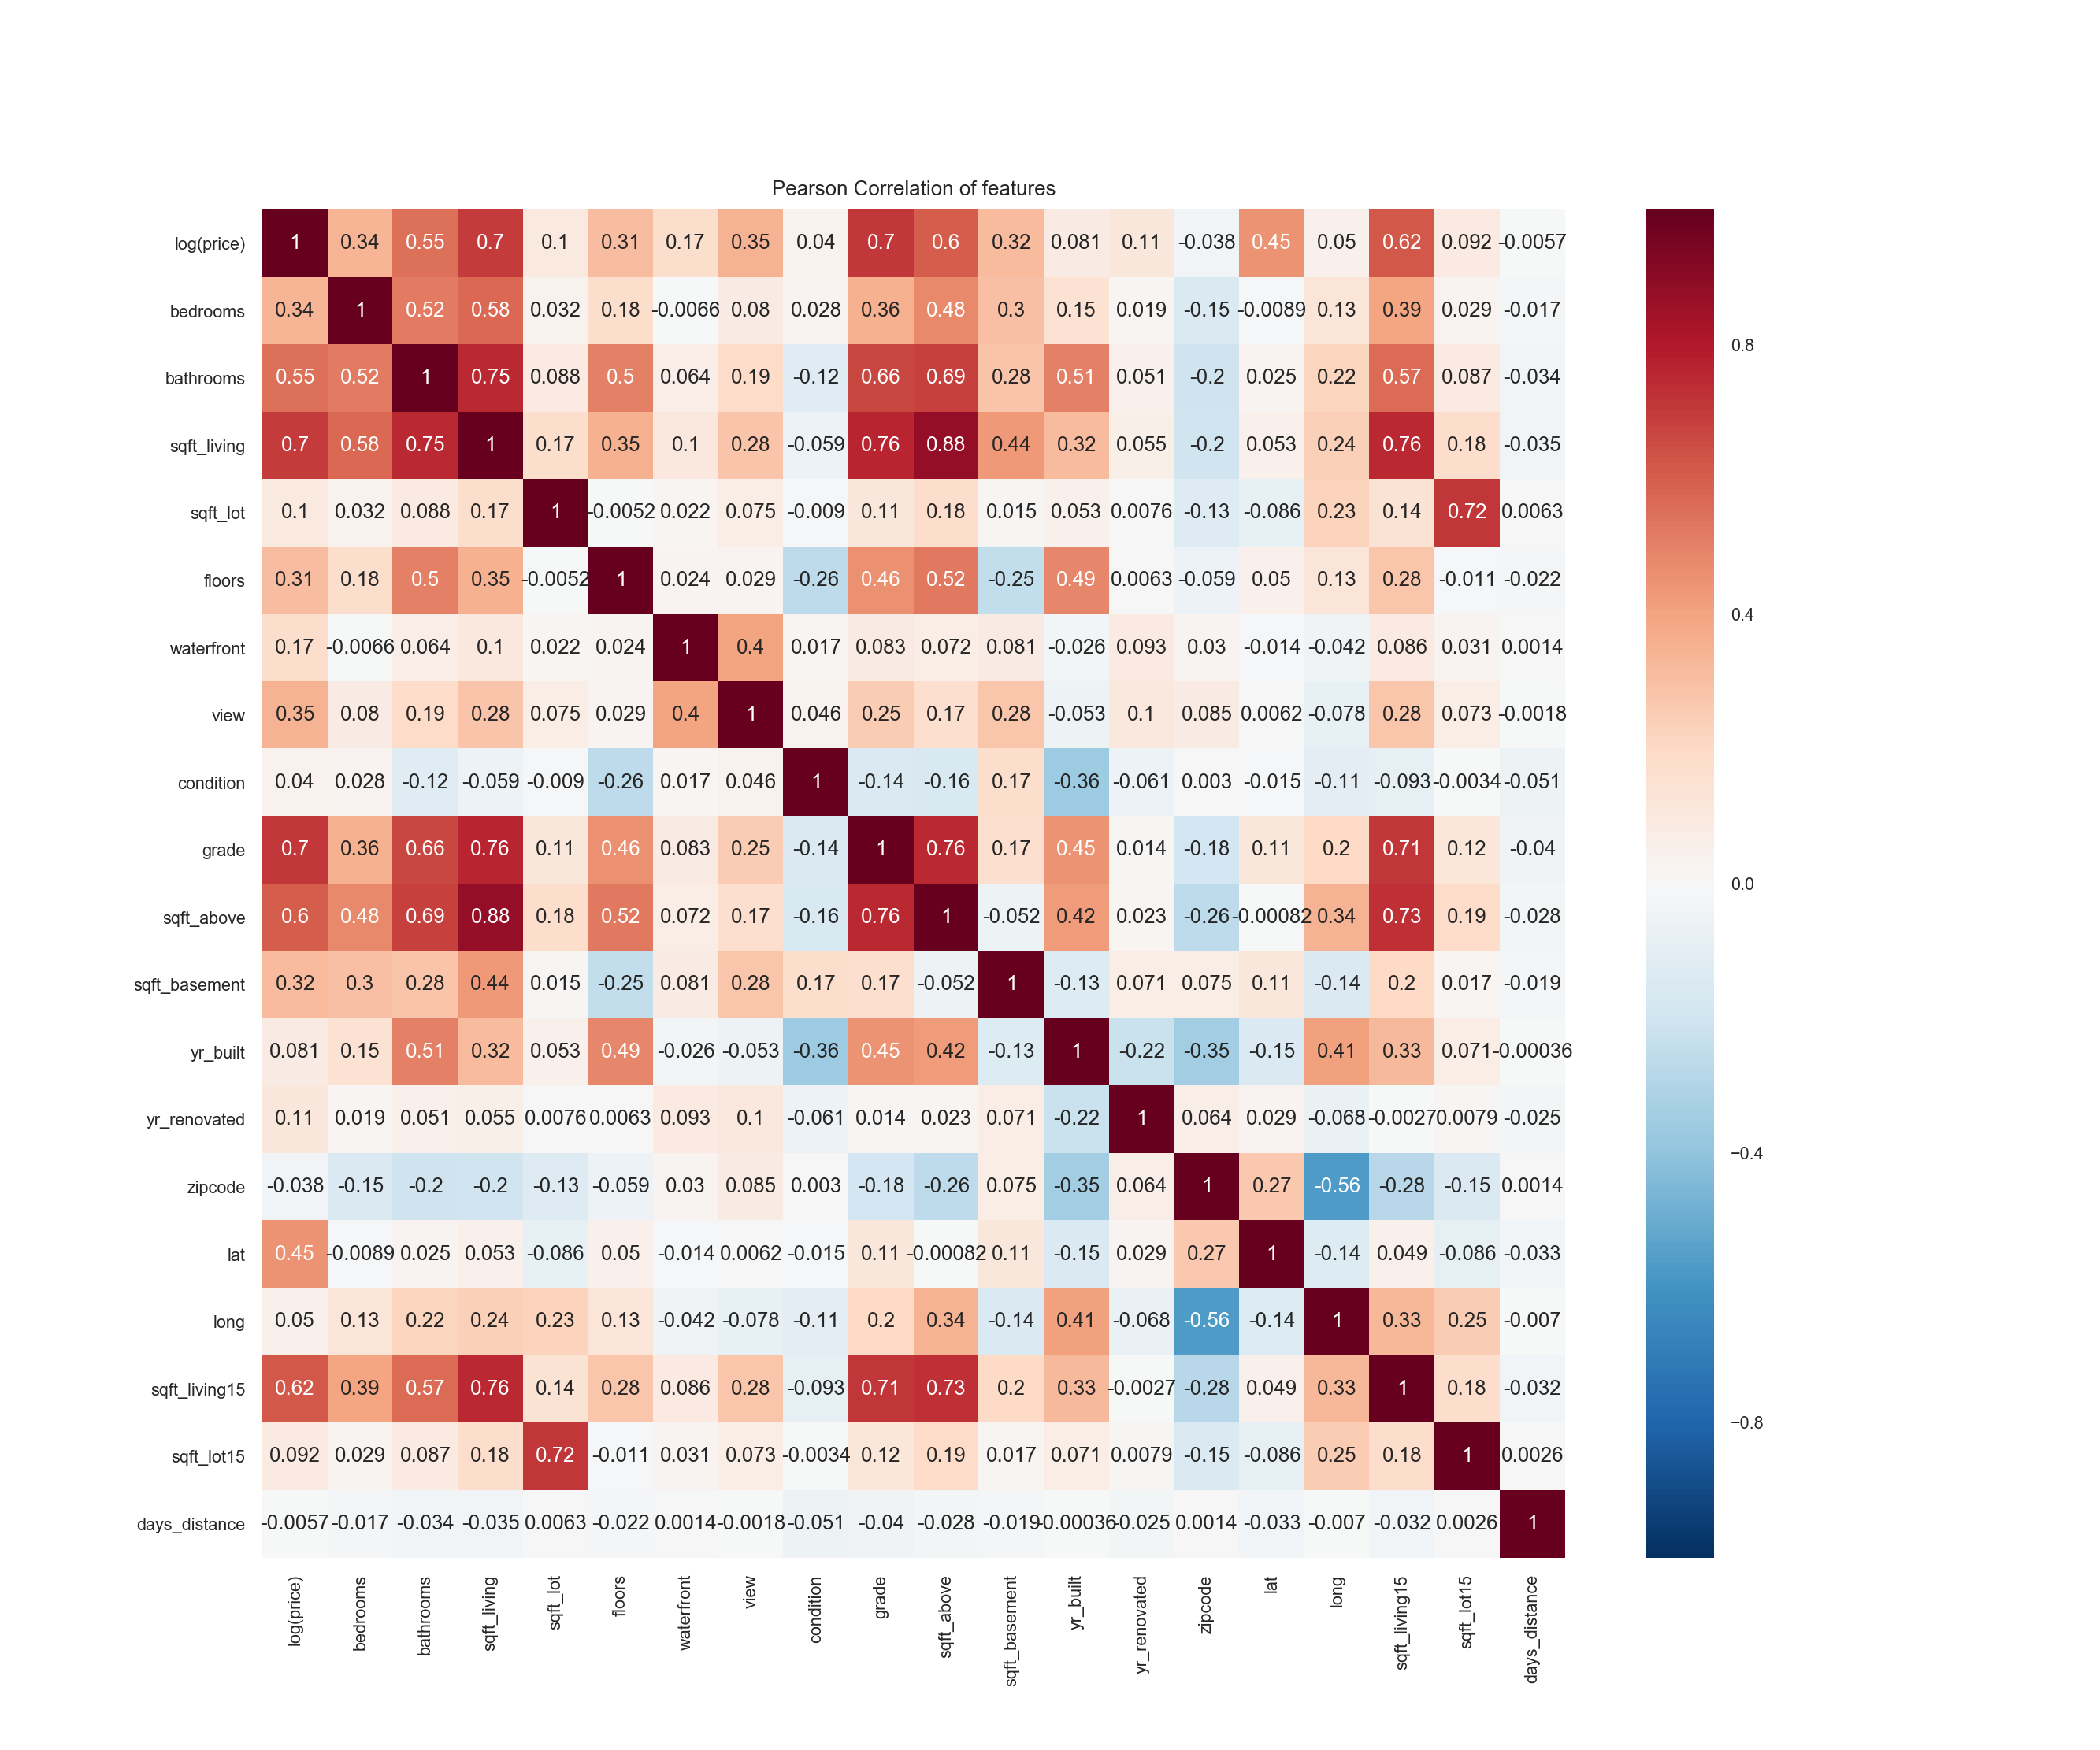

In [149]:
correlation = House0.corr()
plt.figure(figsize=(12, 10))
plt.title('Pearson Correlation of features')
sns.set(font_scale=0.7)
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

At first glance, when we simply treat all variables(id and date excluded) as numeric, we find:

1.There are great correlation between sqft_above and sqrt_living, sqrt_living and sqrt_living and sqrt_living15

2.zipcode seems that poor correlation with all variables except longitude, it totally makes sense.

3.days_distance also have poor correlation with all the variables. It makes sense as well, because when the house was sold cannot influent the price or any other features. Let's explore its distribution(histgram). From the histgram we find the trading volumn of the houses decreases from 2014-05-02 to almost 250 days later, however, it increases after that. 

<IPython.core.display.Javascript object>


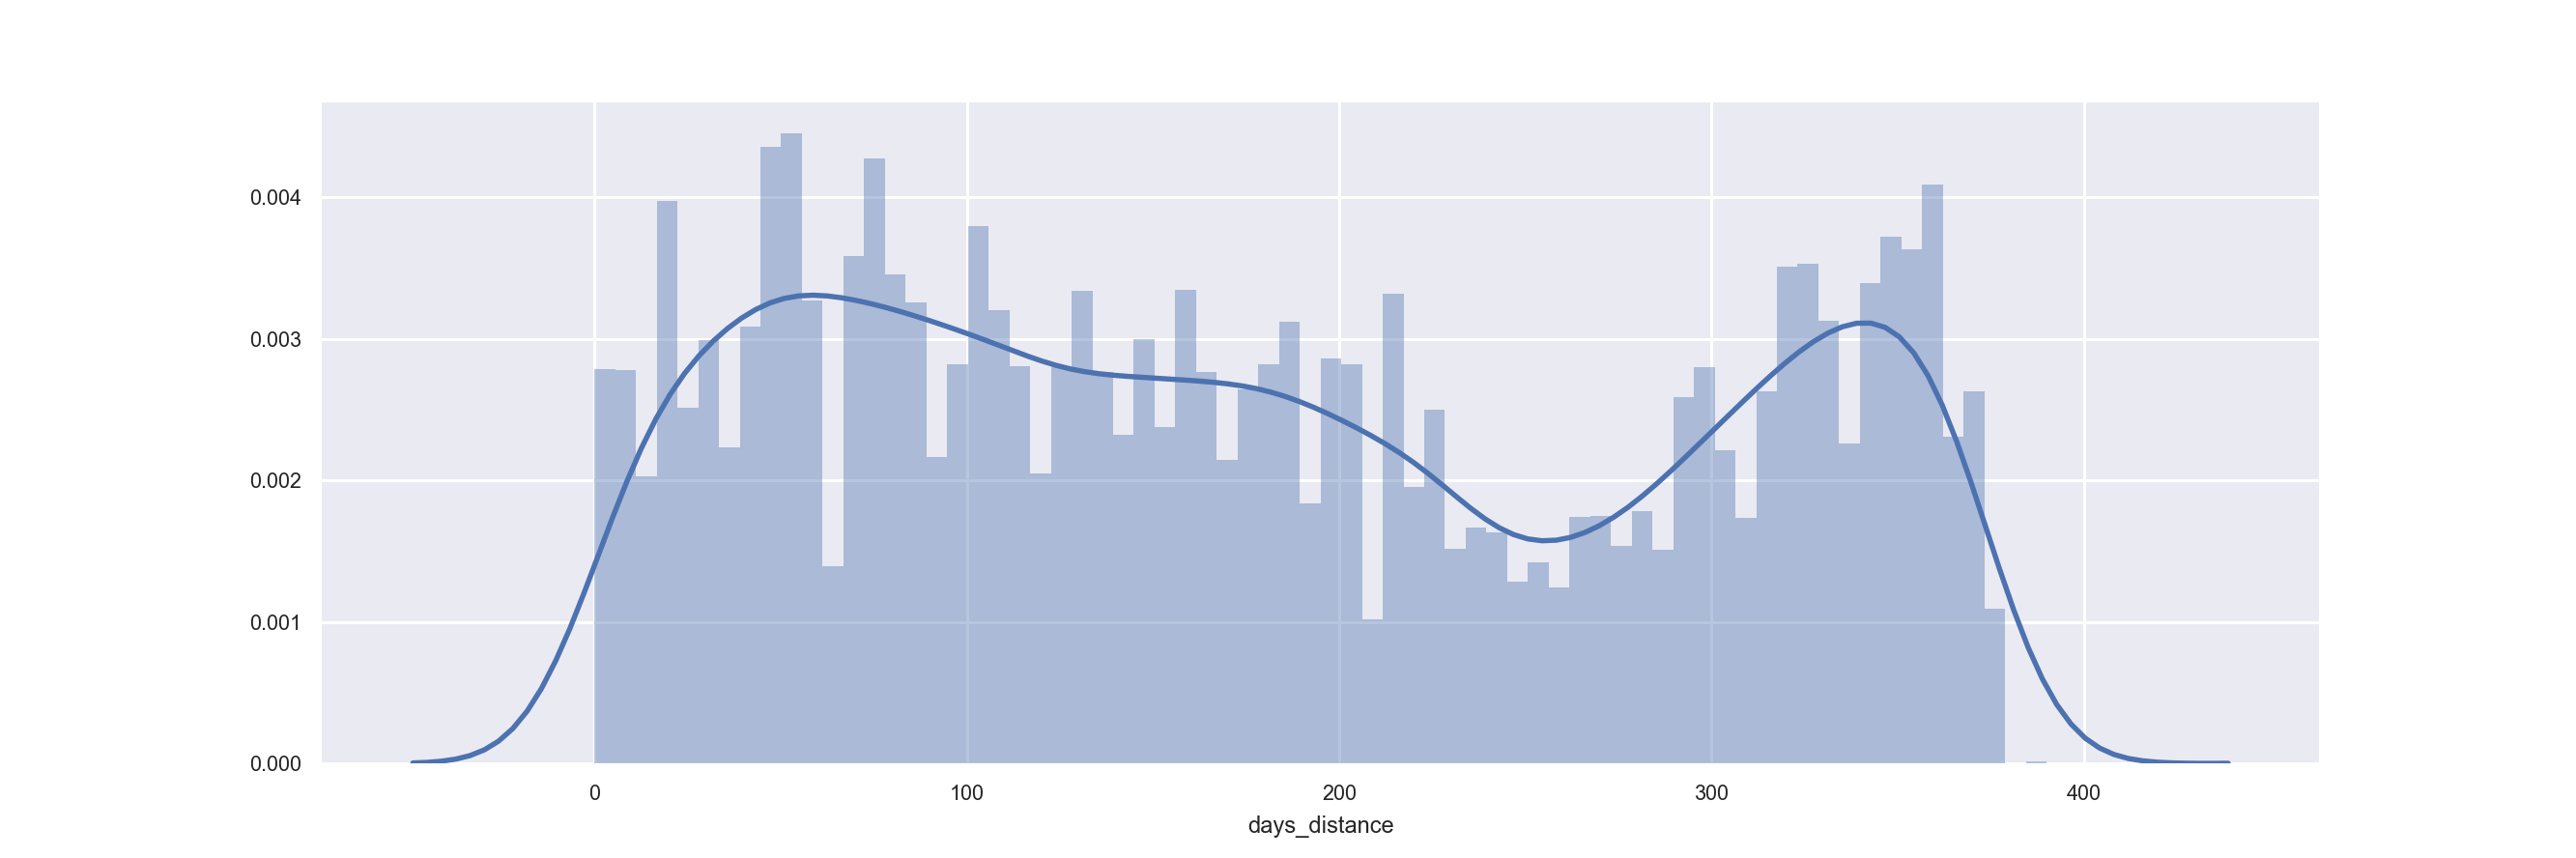

In [150]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(House0['days_distance'],kde=True,bins = 70)
plt.show()

4.Of course, we cannot just simply treat all variables as numerical variables. So let's see the scatter plots as follows

## 2.3.1 Create scatter plots Price VS other features(id, date excluded)

In [151]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
//First, a simple command to increase the maximum size of the output cells in the notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


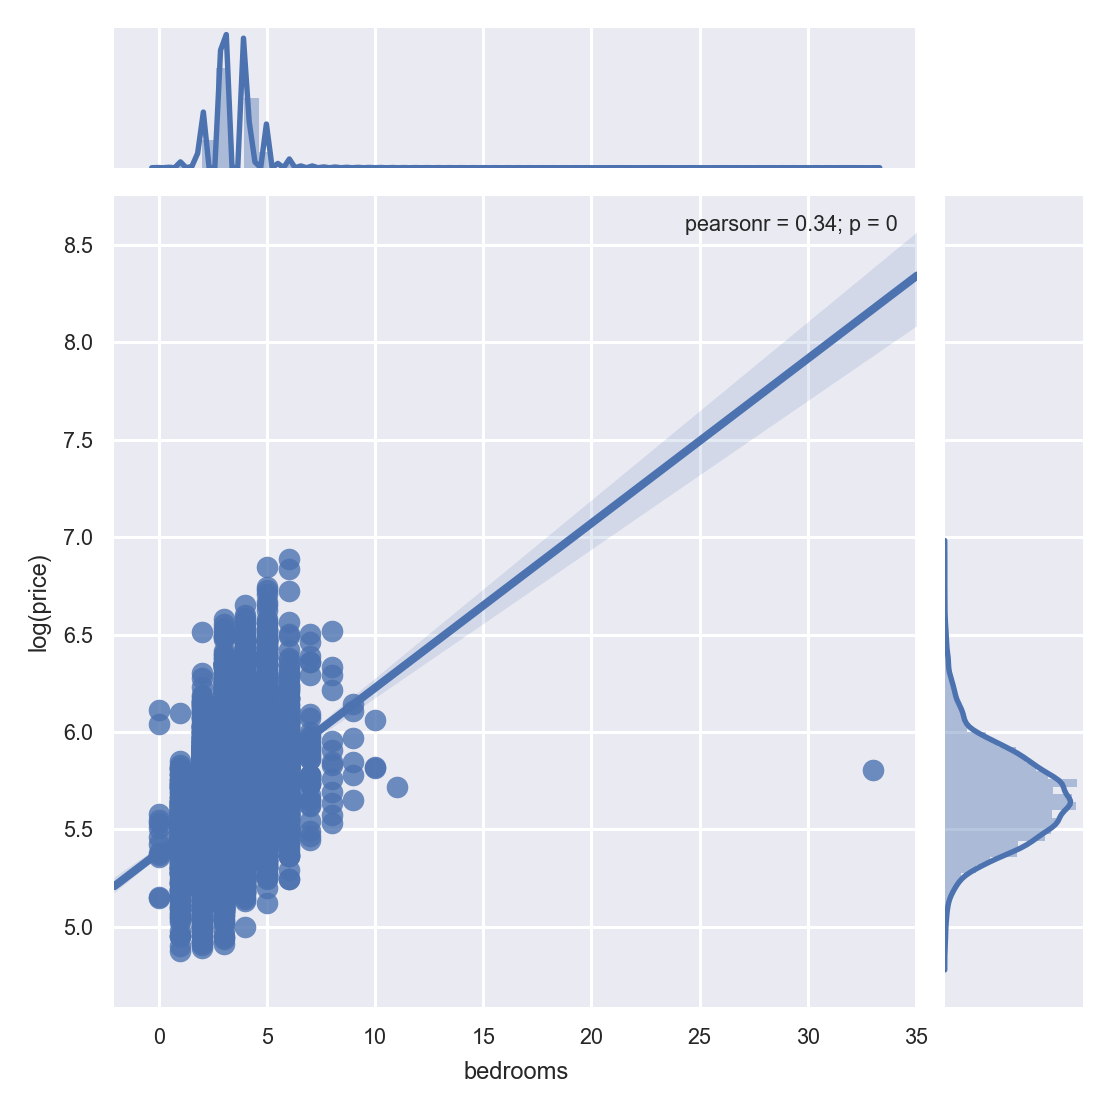

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


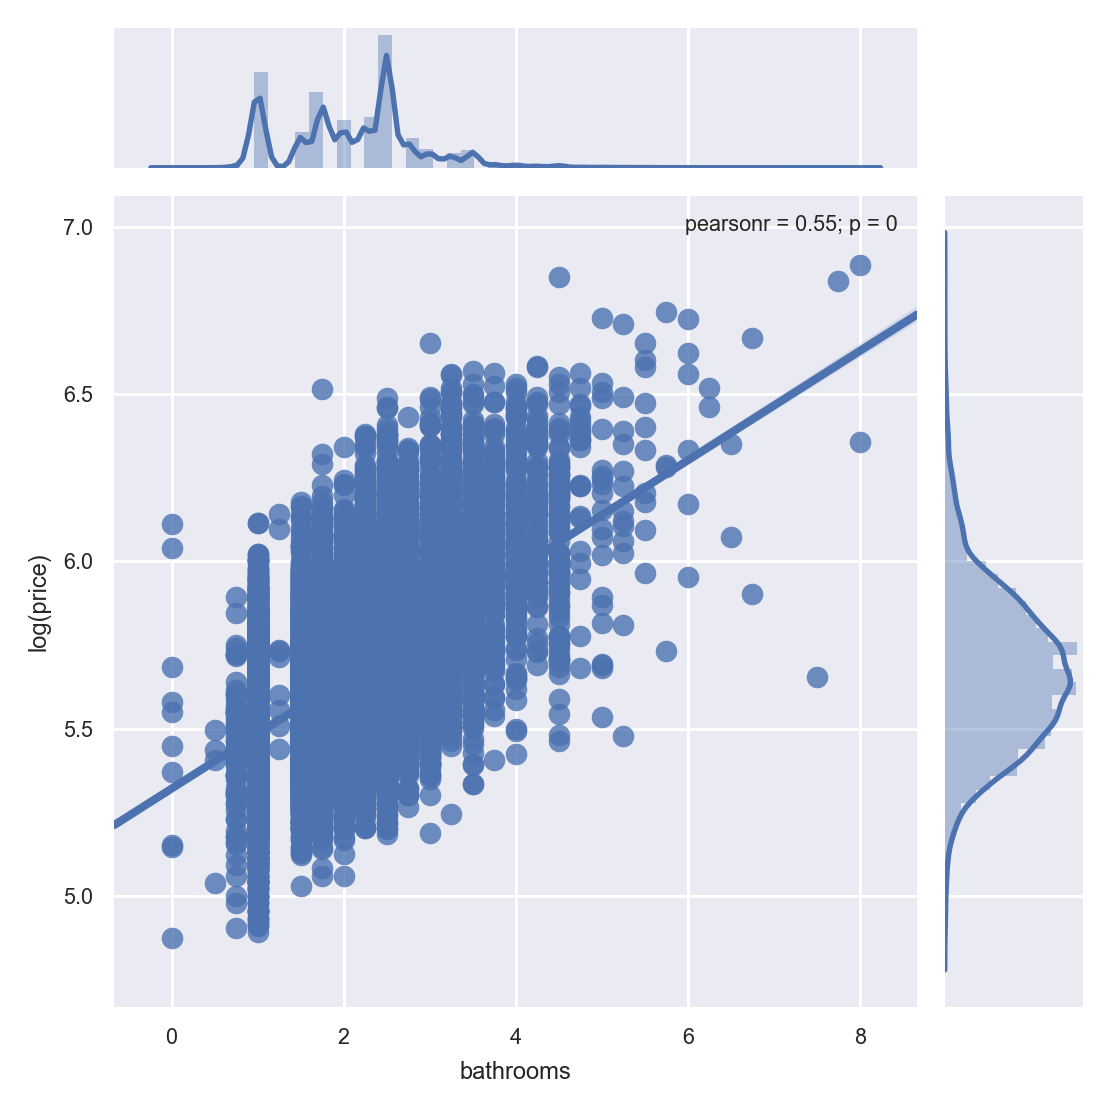

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


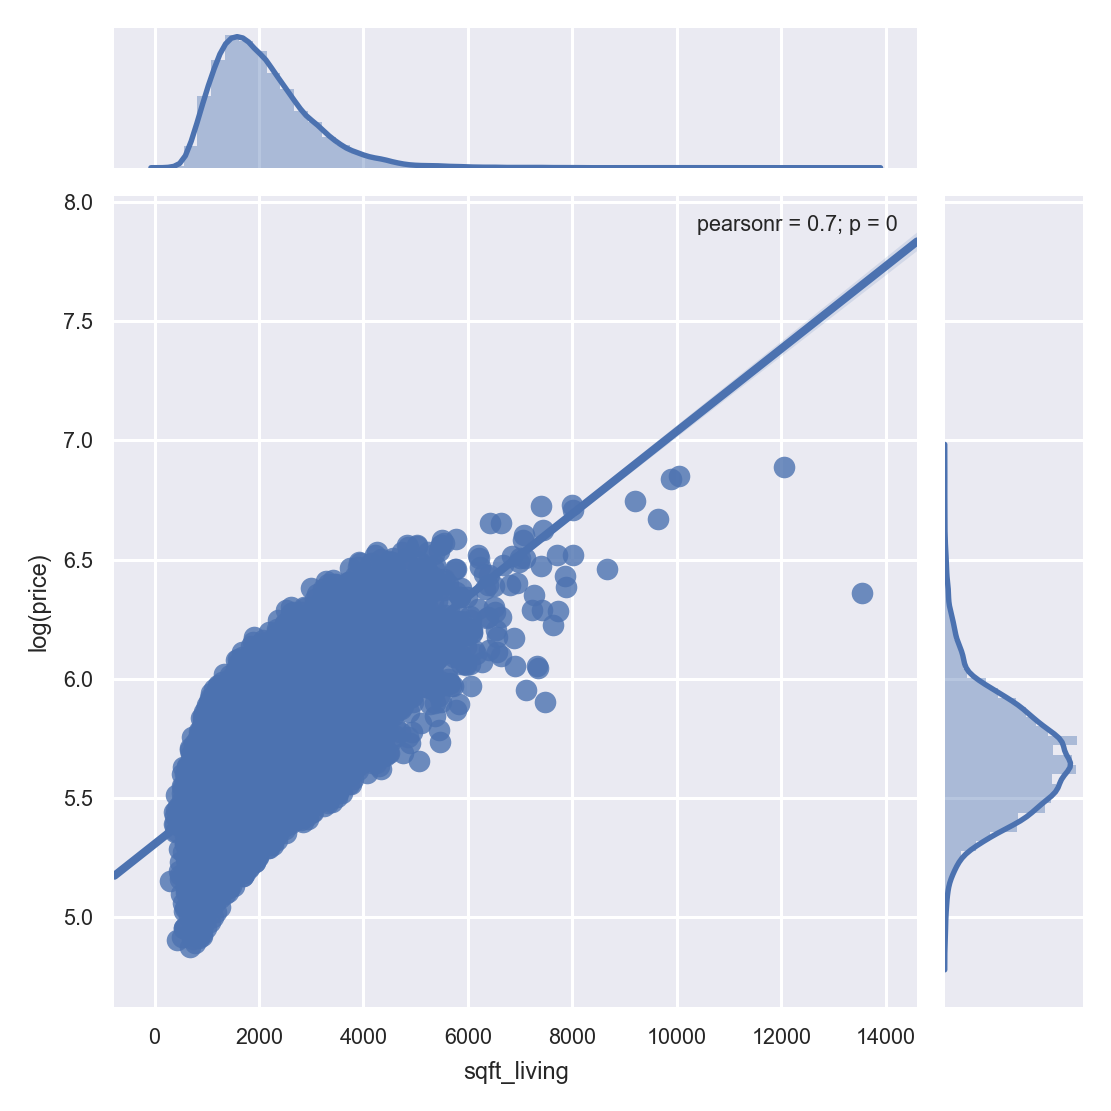

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


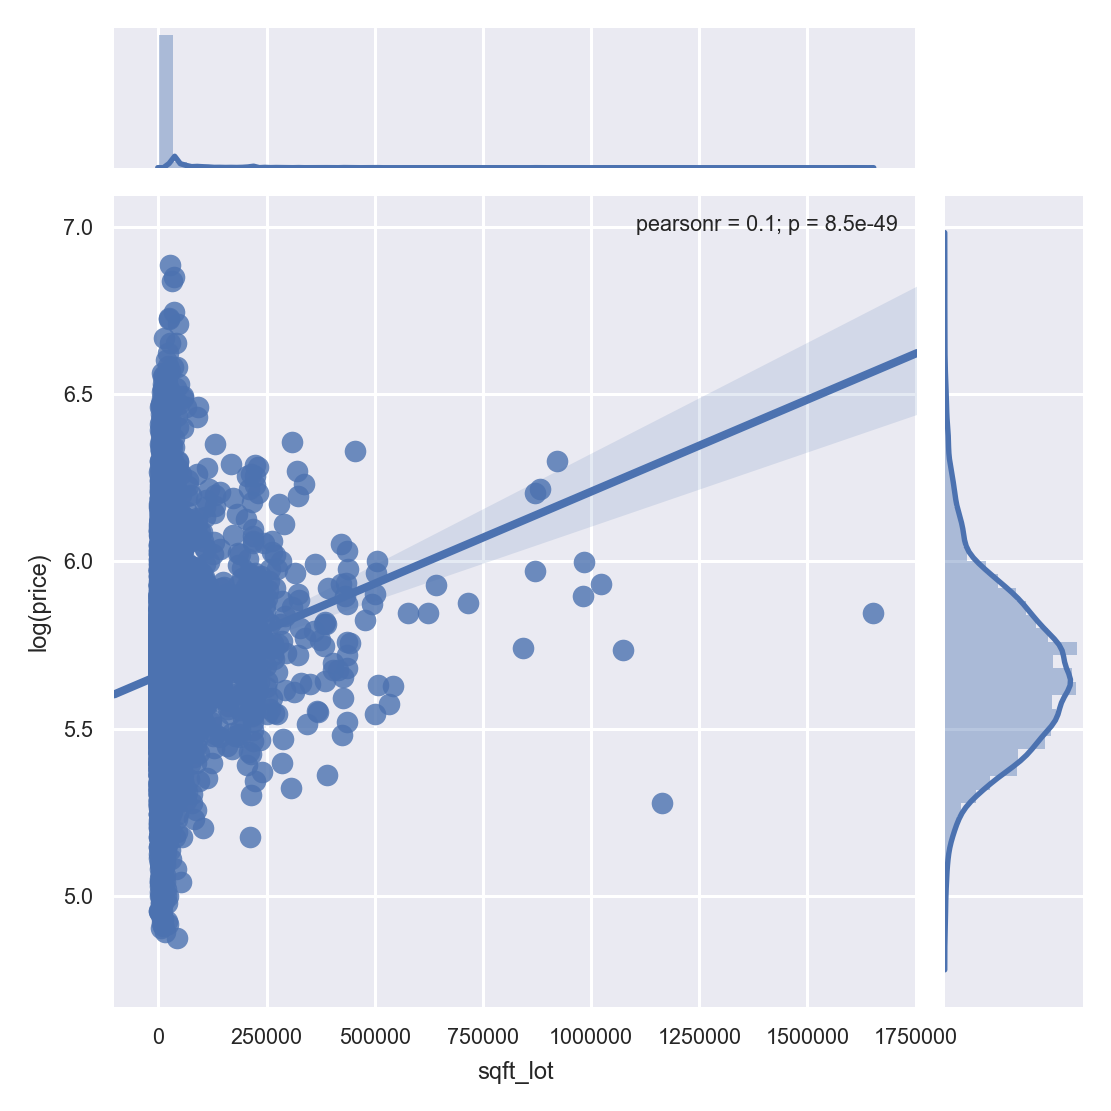

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


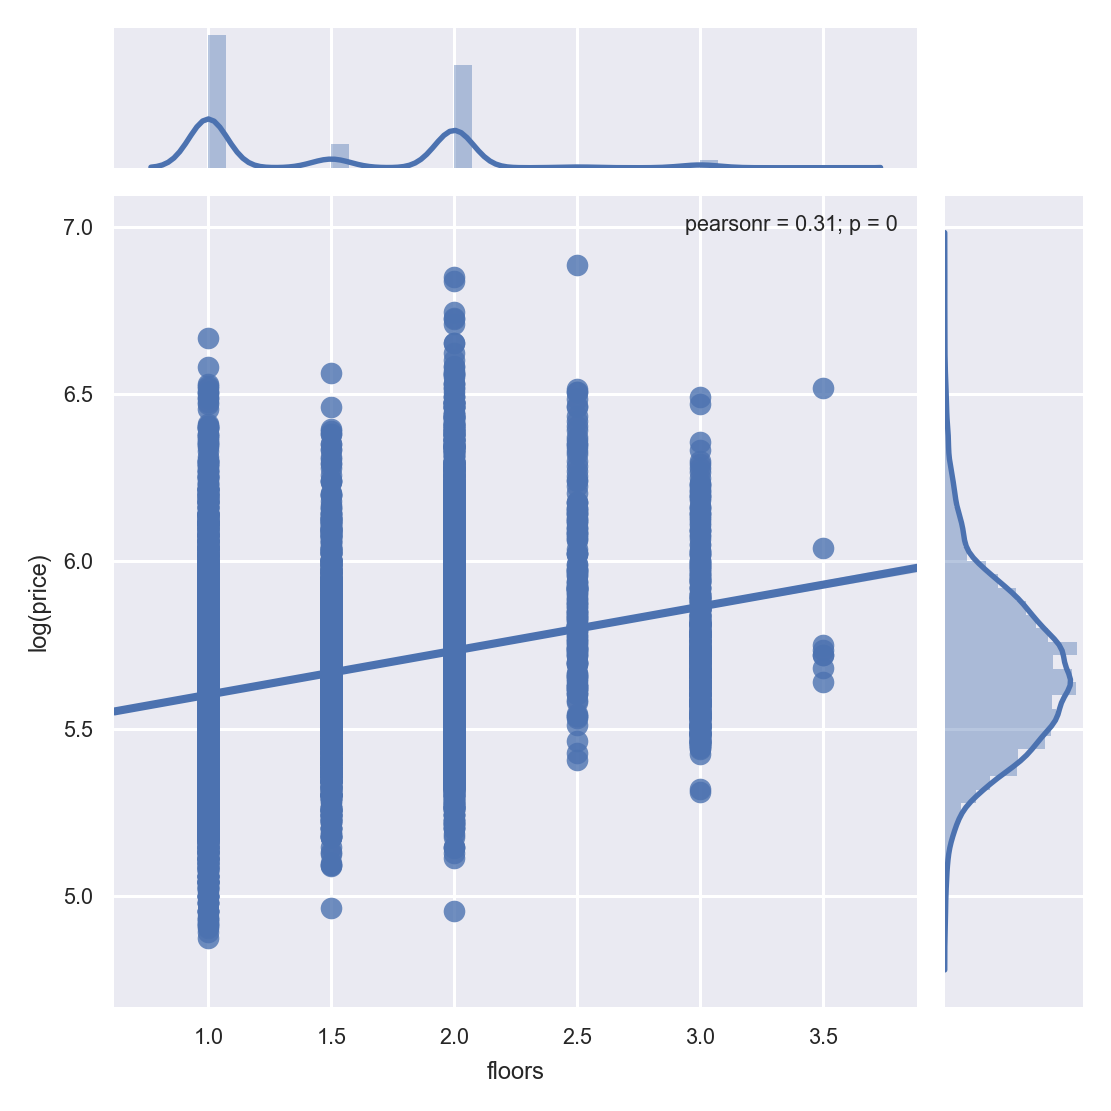

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


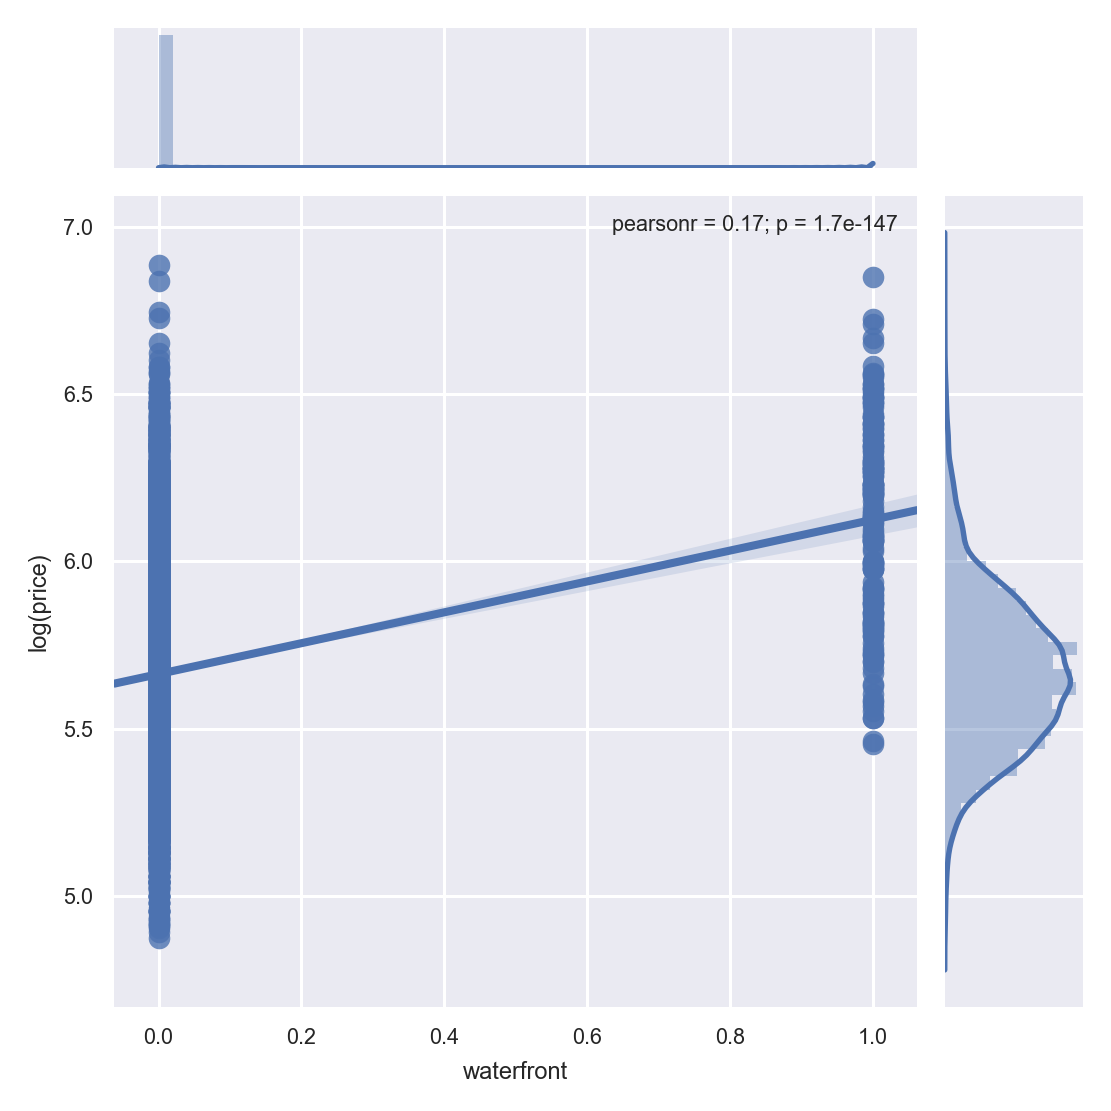

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


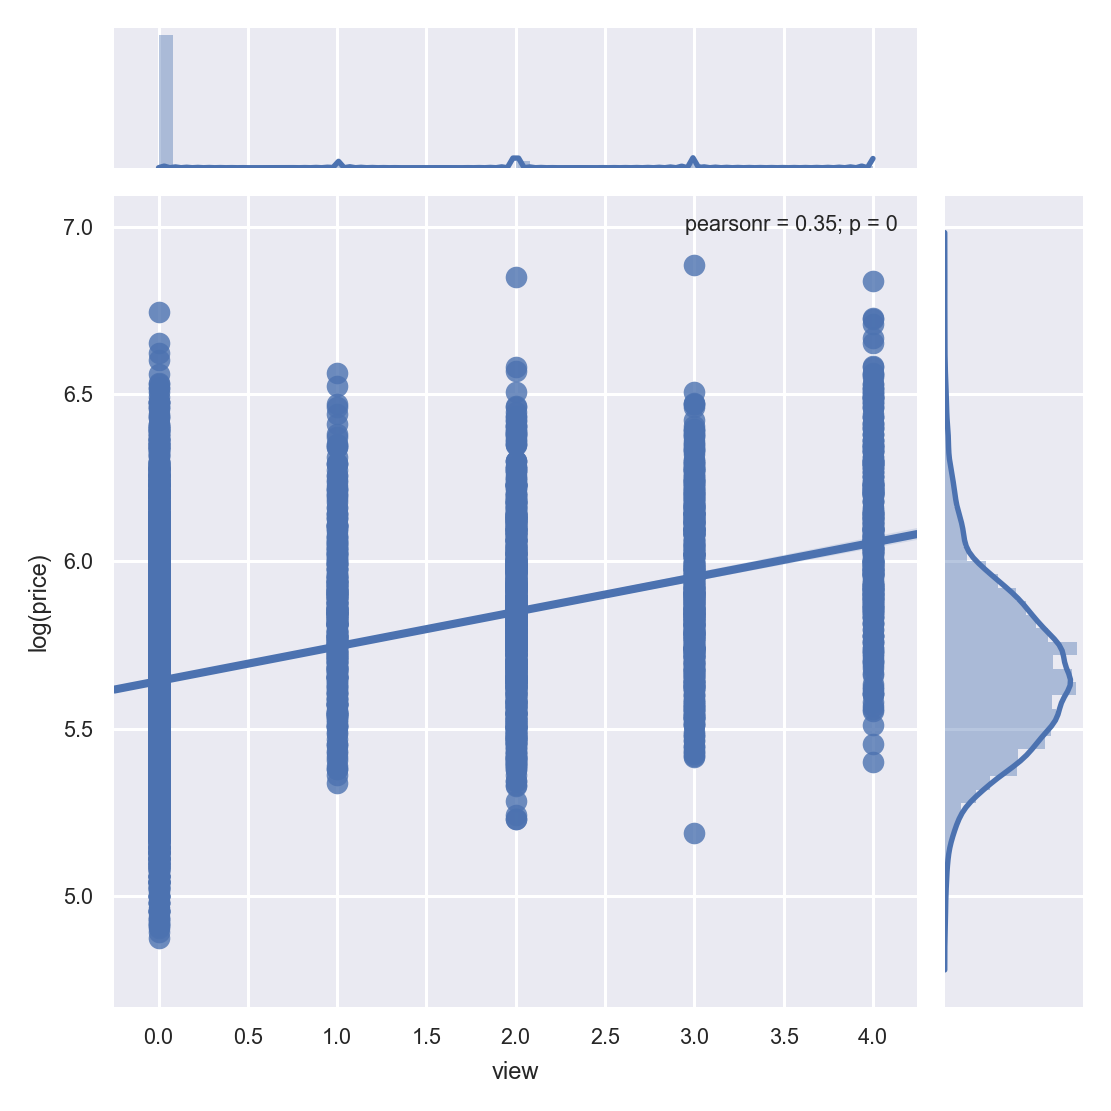

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


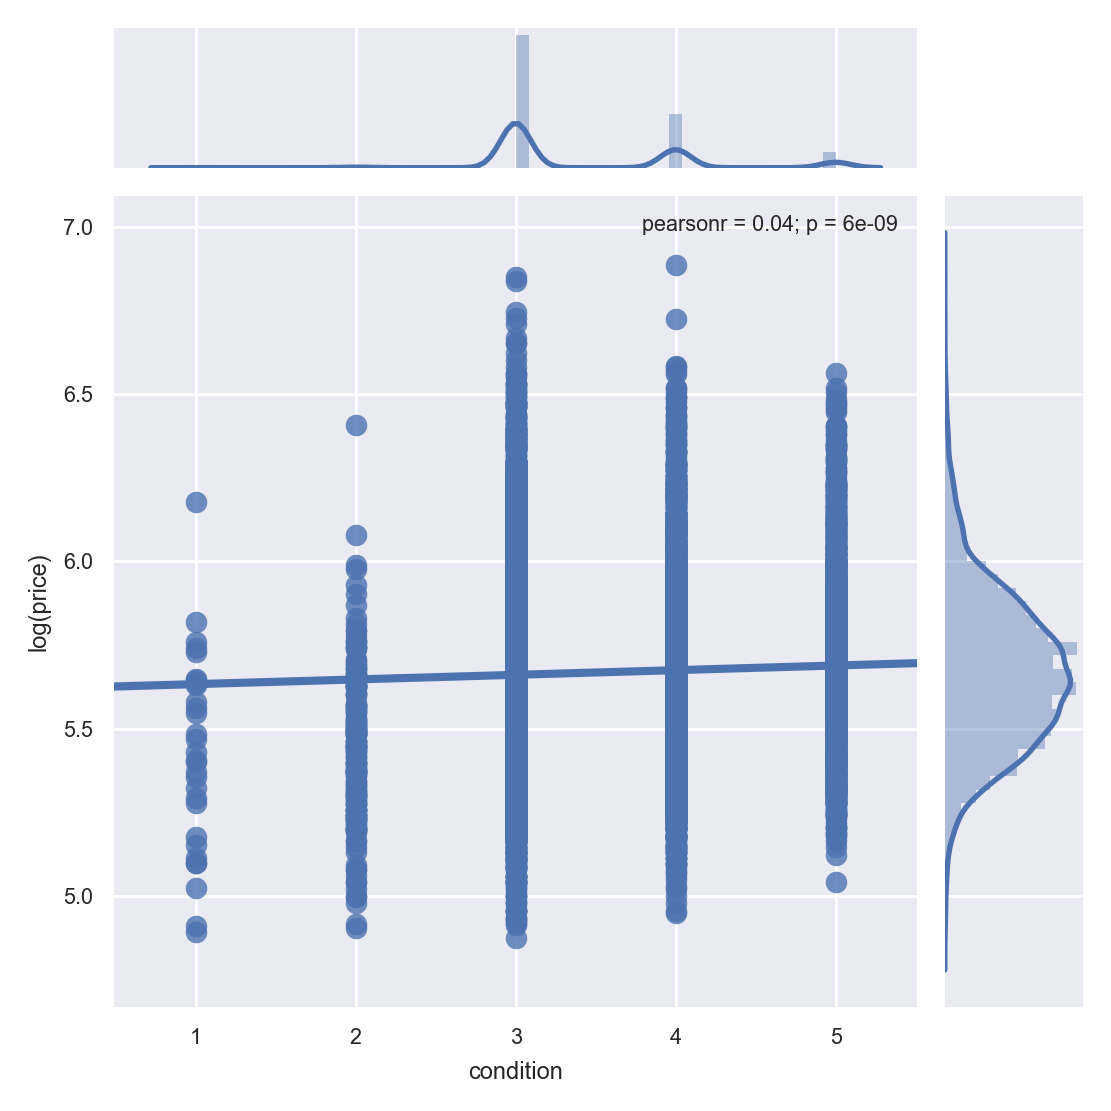

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


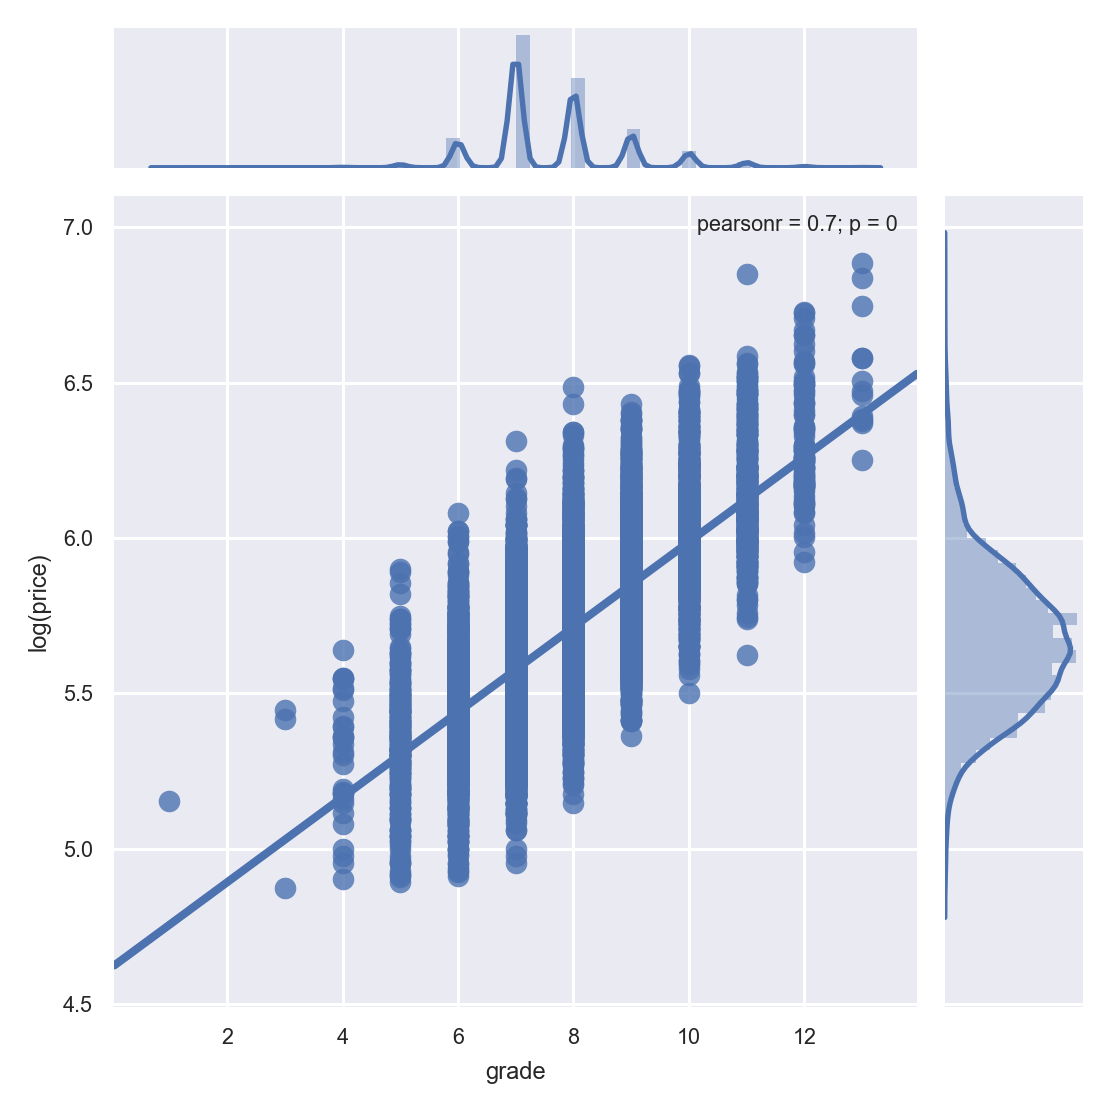

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


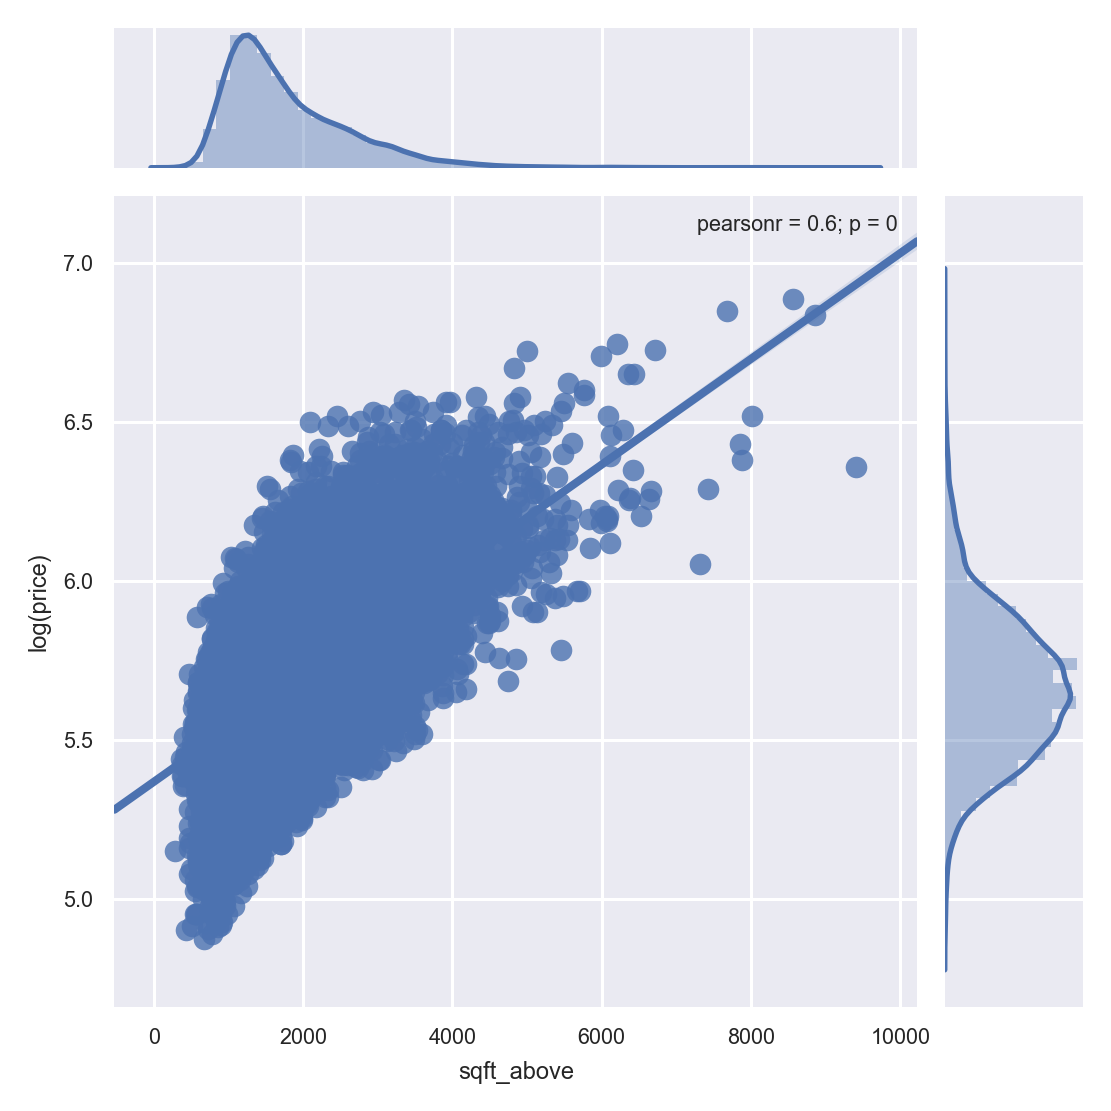

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


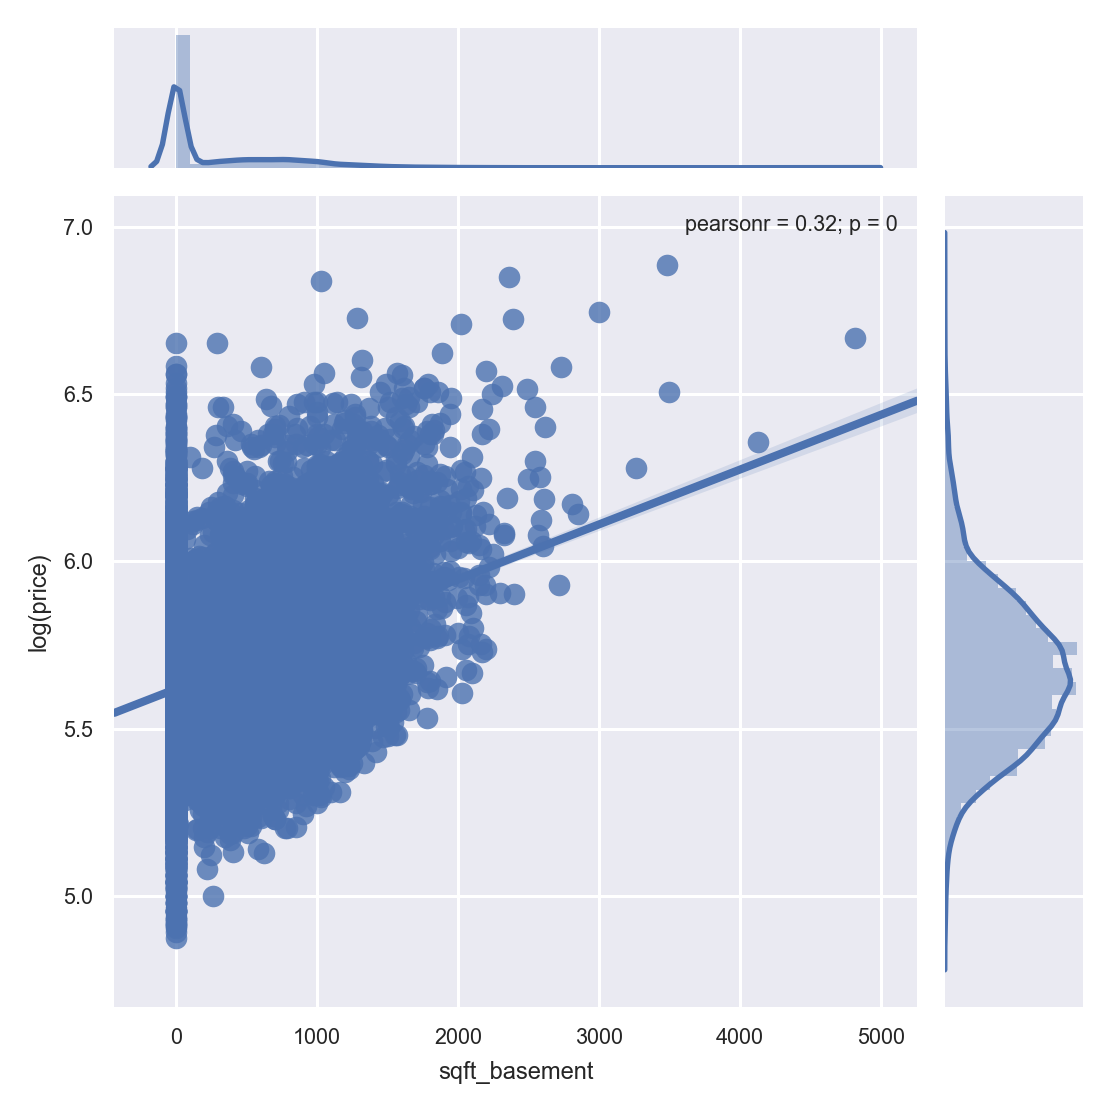

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


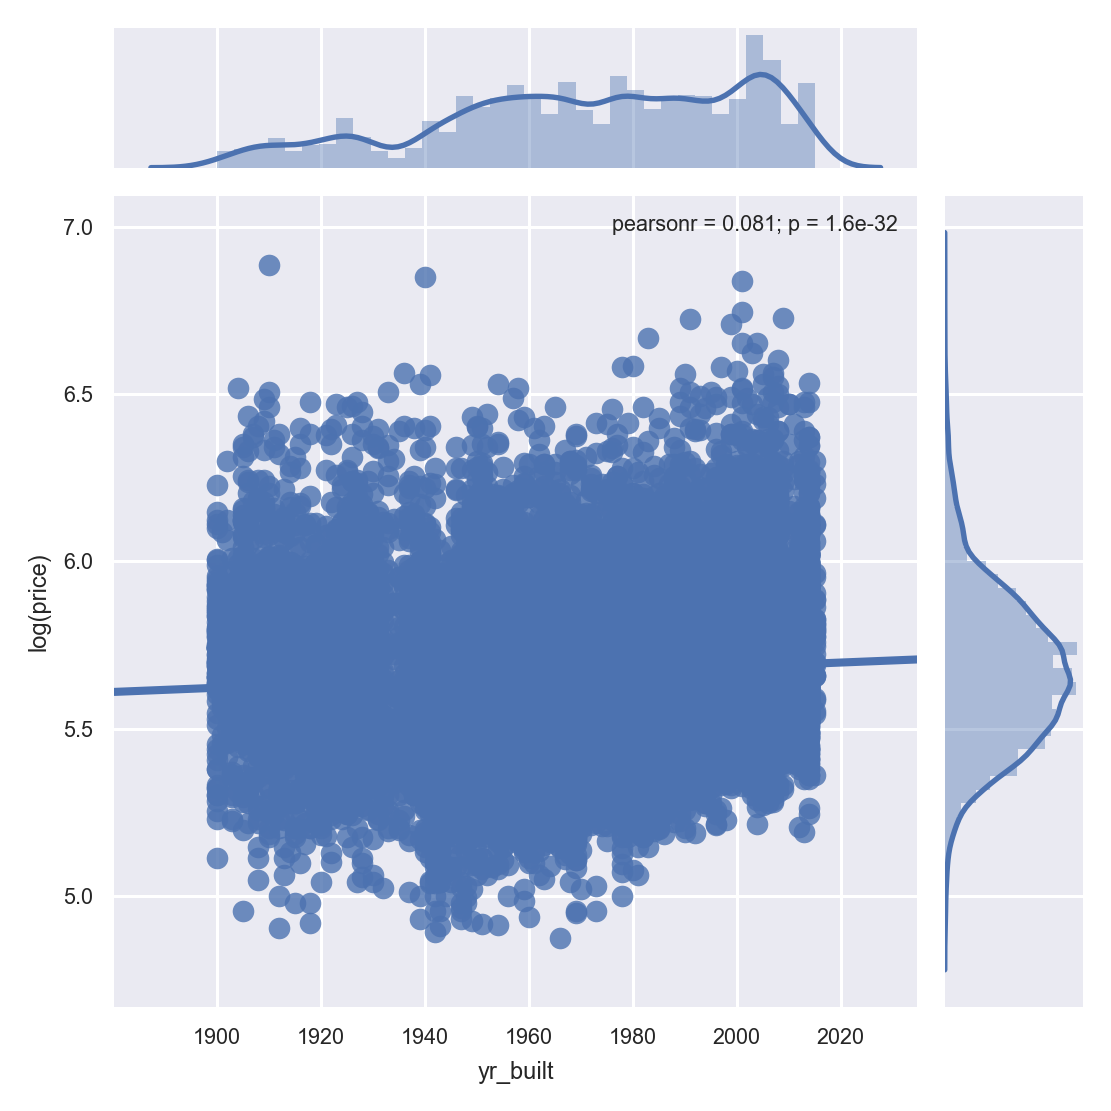

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


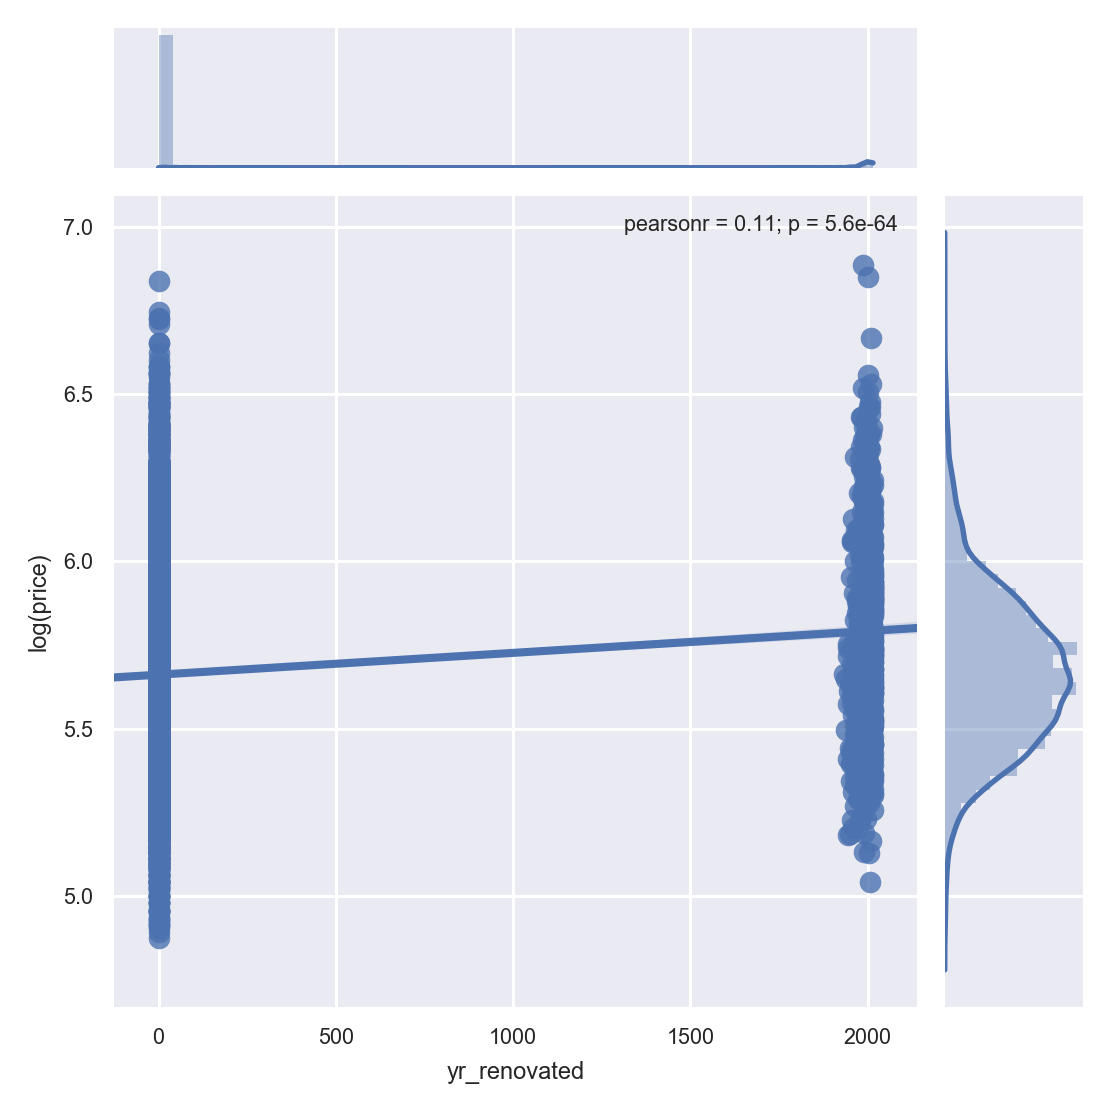

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


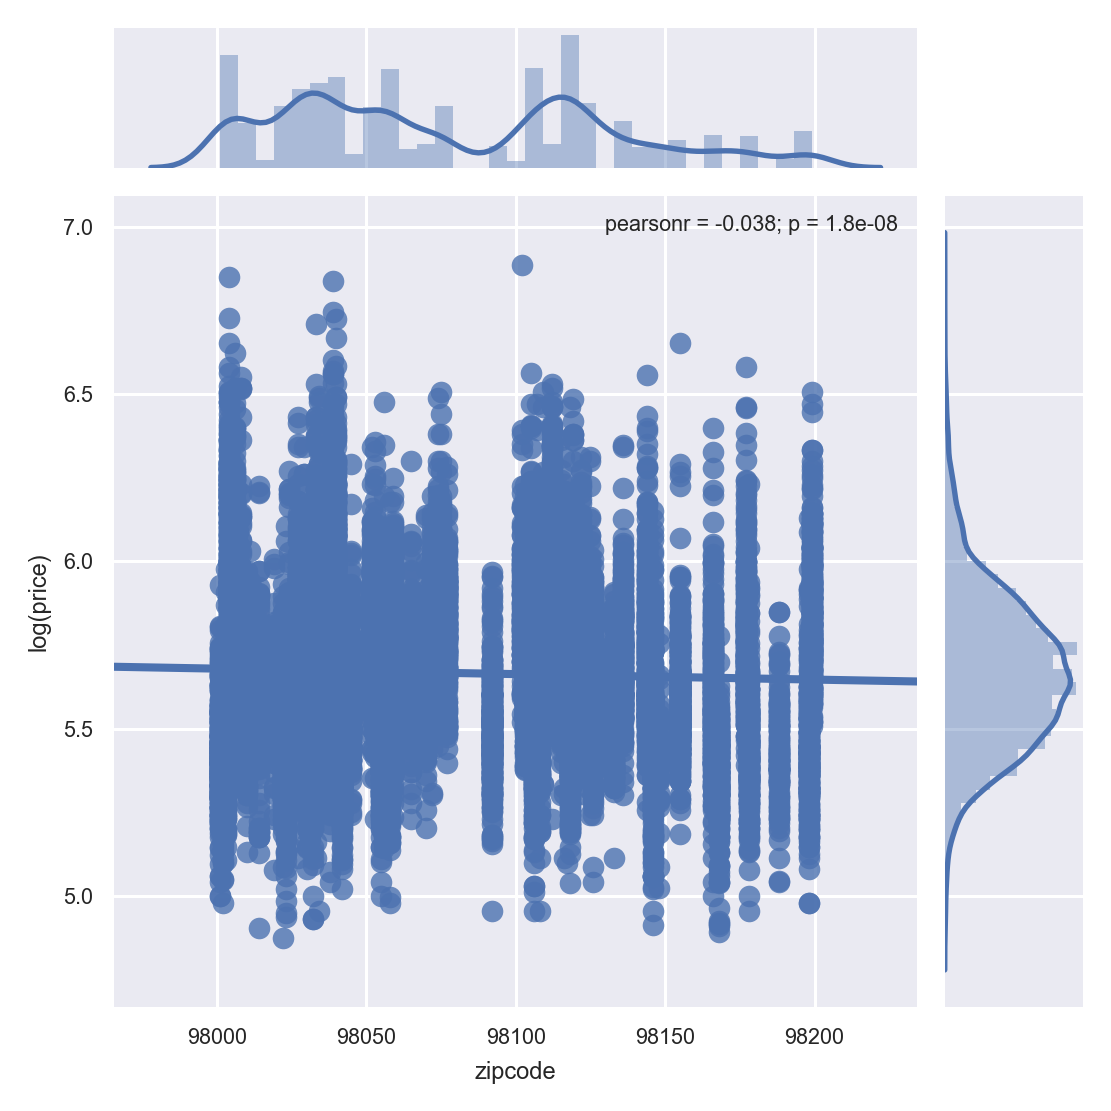

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


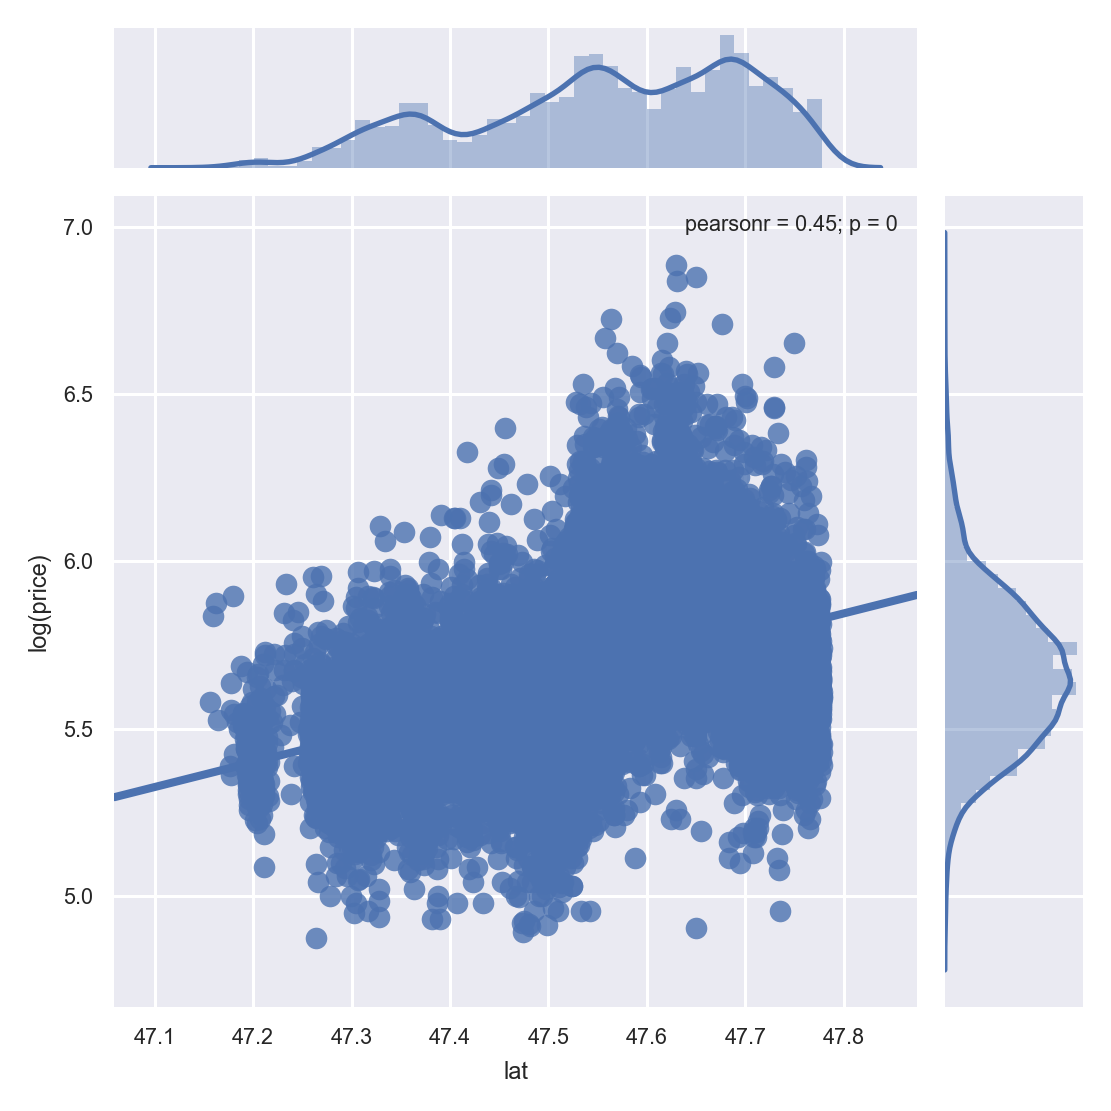

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


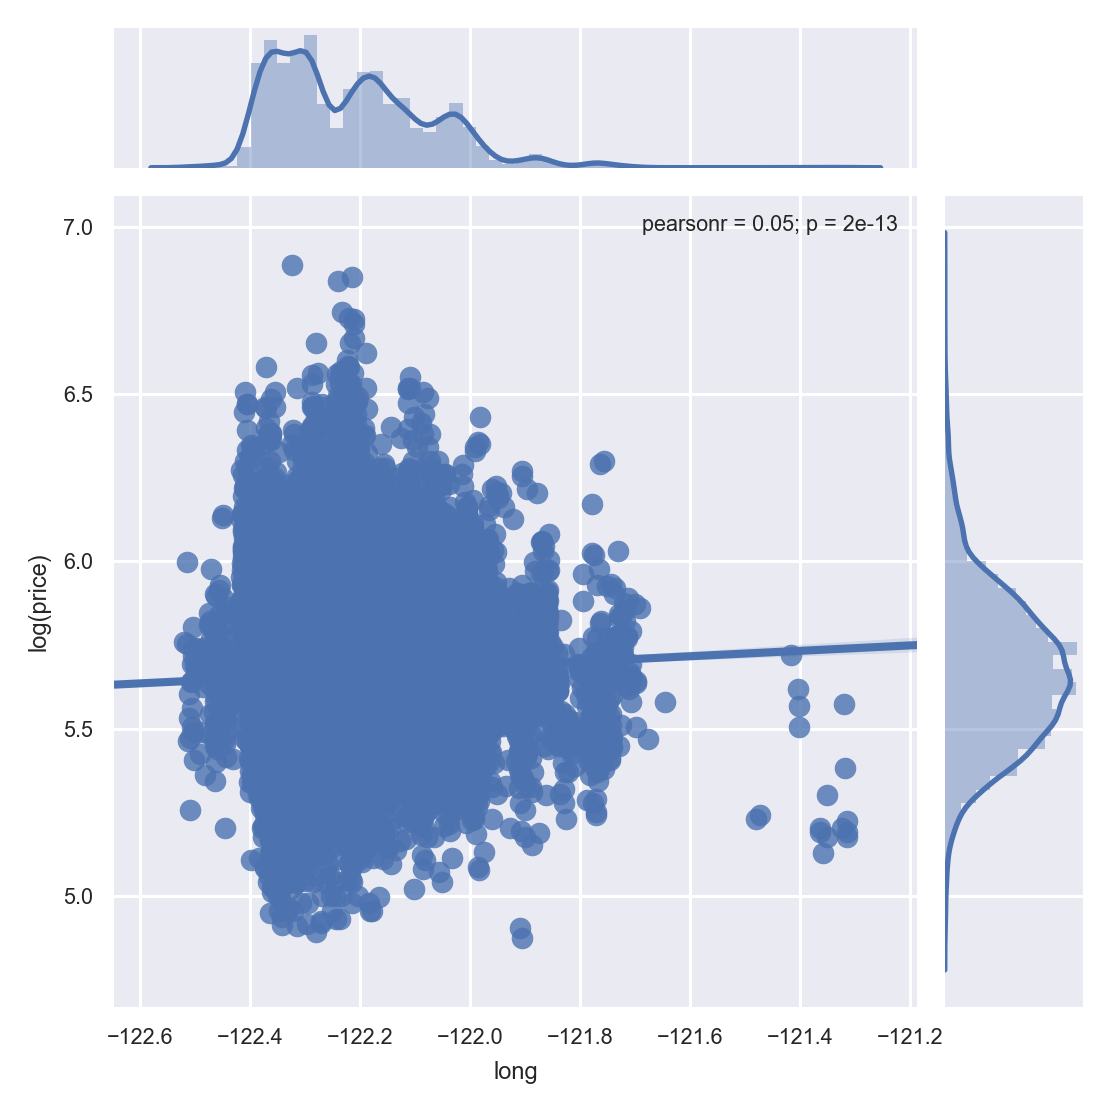

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


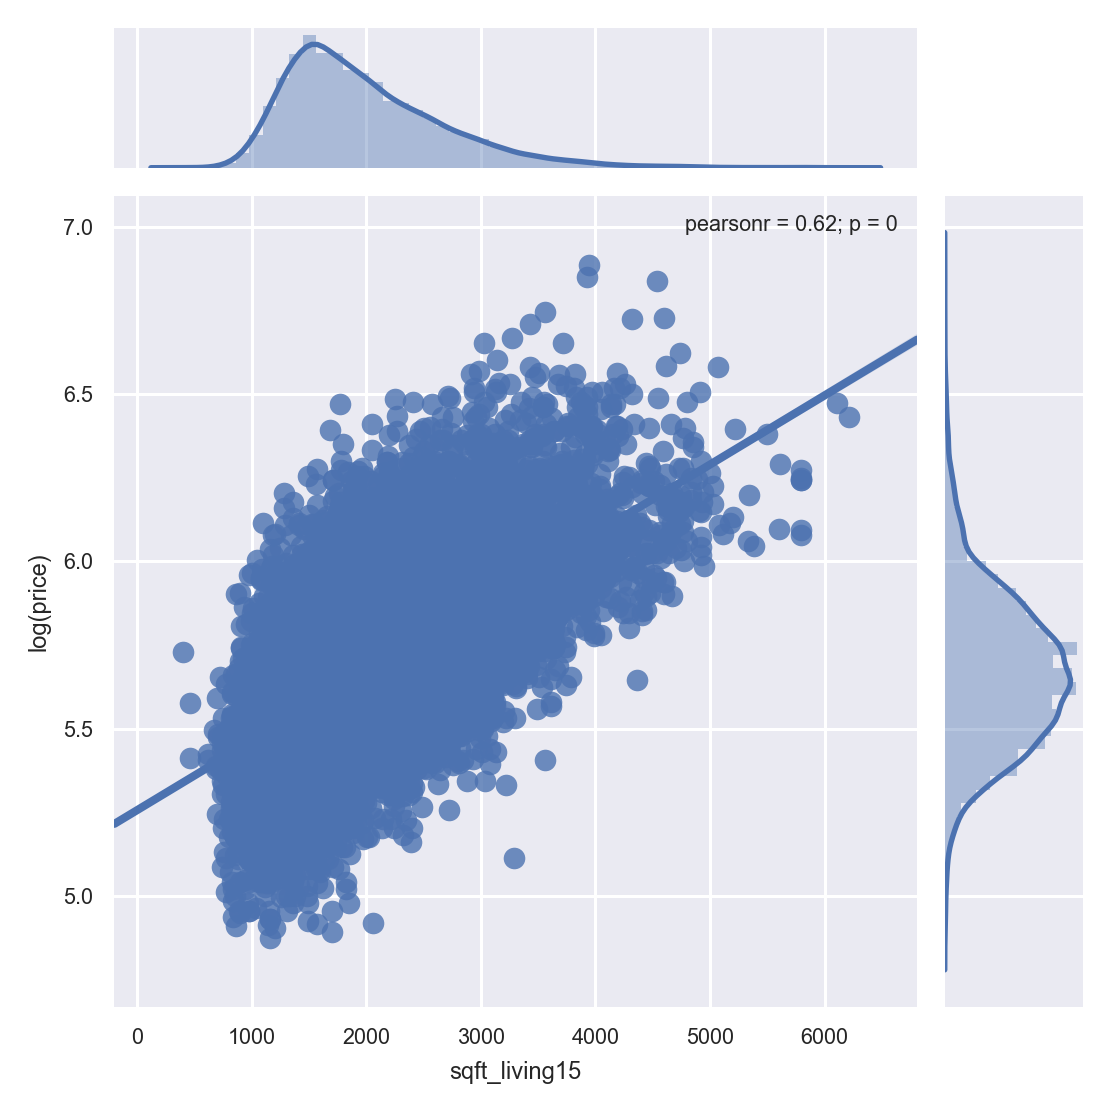

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


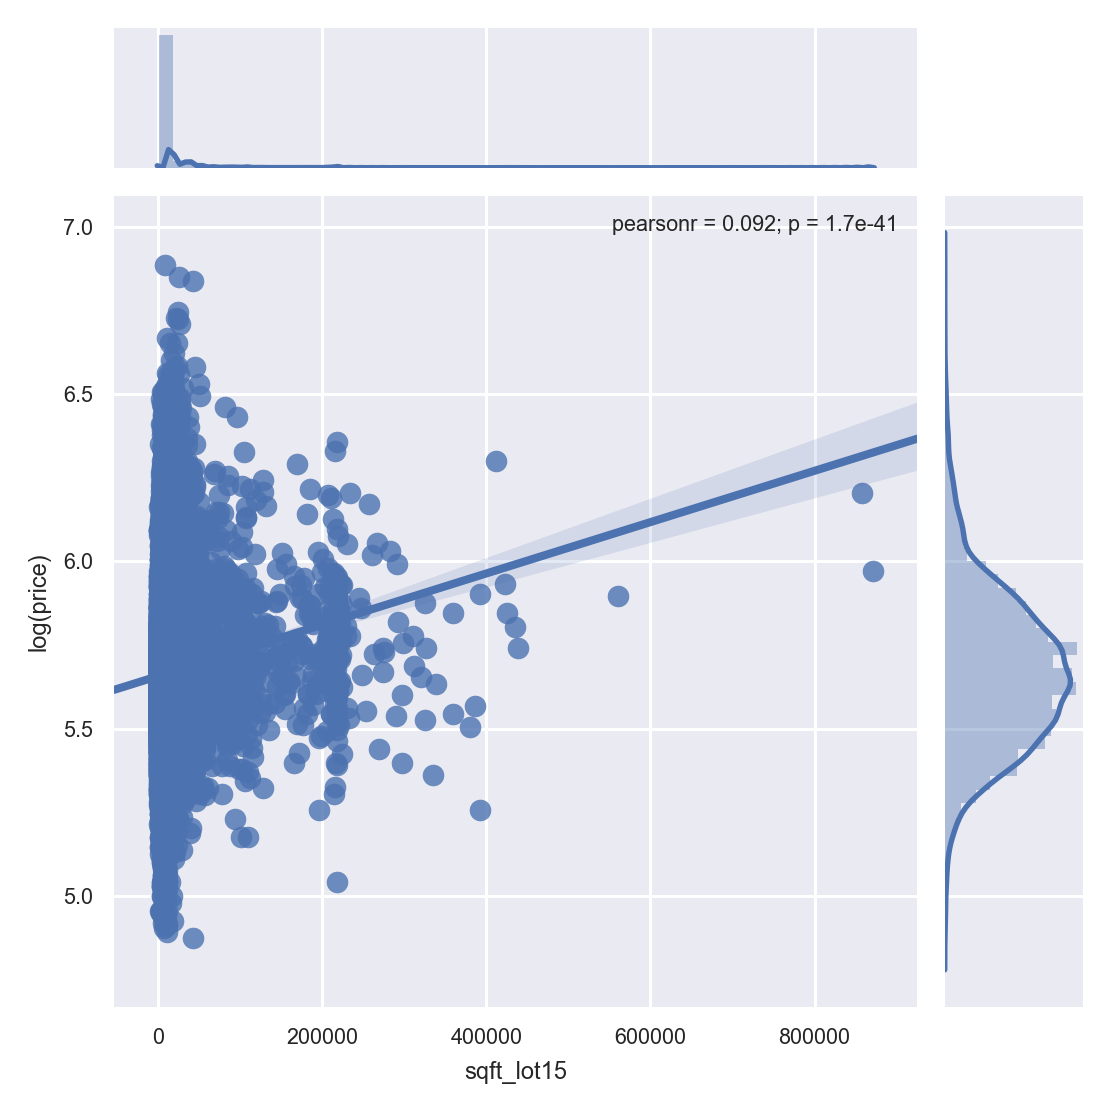

/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/eluo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [70]:
IndexList = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
             'floors', 'waterfront', 'view', 'condition', 'grade',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
             'lat', 'long', 'sqft_living15', 'sqft_lot15']
for n in range(0,len(IndexList)):
    #print(IndexList[n])
    sns.jointplot(x=IndexList[n], y="log(price)", data=House0, kind = 'reg', size = 5)
plt.show()

## 2.3.2 From the scatterplots above, we can see:

* 1. Column 'yr_renovated' seems like numeric variable, however, there are many points on 0, other points are around 2000, we treat it as categorical variable. 0 means the house is not renovated, 1 means the house is renovated. And then add a new variable which explain the value when it is renovated.

* 2. Column 'waterfront' is obviously a categorical feature with all values either 0 or 1.

* 3. There are some outliers, for example: one point bedroom >30 and sqft_living > 11500

* 4. There maybe some skewness on variable sqrt_lot and sqrt_lot15, we need to test skewness using qqplot

* 5. Column 'zipcode' can be excluded because there are too many levels if we treat it as categorical variable. But we can create map plot using this feature. This part will be in the end of our pipeline
* 6. Column 'grade' is categorical feature with more than 10 levels, let's check the boxplot of log(price) VS grade.

## * 1. Deal with 'yr_renovated' and 'sqft_basement'

In [152]:
HouseA = House0
# Create 2 new columns for the analysis 
HouseA['yr_renovated2'] = HouseA['yr_renovated'].apply(lambda x: x if x > 0 else None)
print(HouseA['yr_renovated2'].min(),HouseA['yr_renovated2'].max())

# Change None to 1, which means YES in the two columns 'sqft_basement','sqft_basement'
HouseA['yr_renovated'] = HouseA['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

A = HouseA['yr_renovated2'].dropna()

1934.0 2015.0


<IPython.core.display.Javascript object>


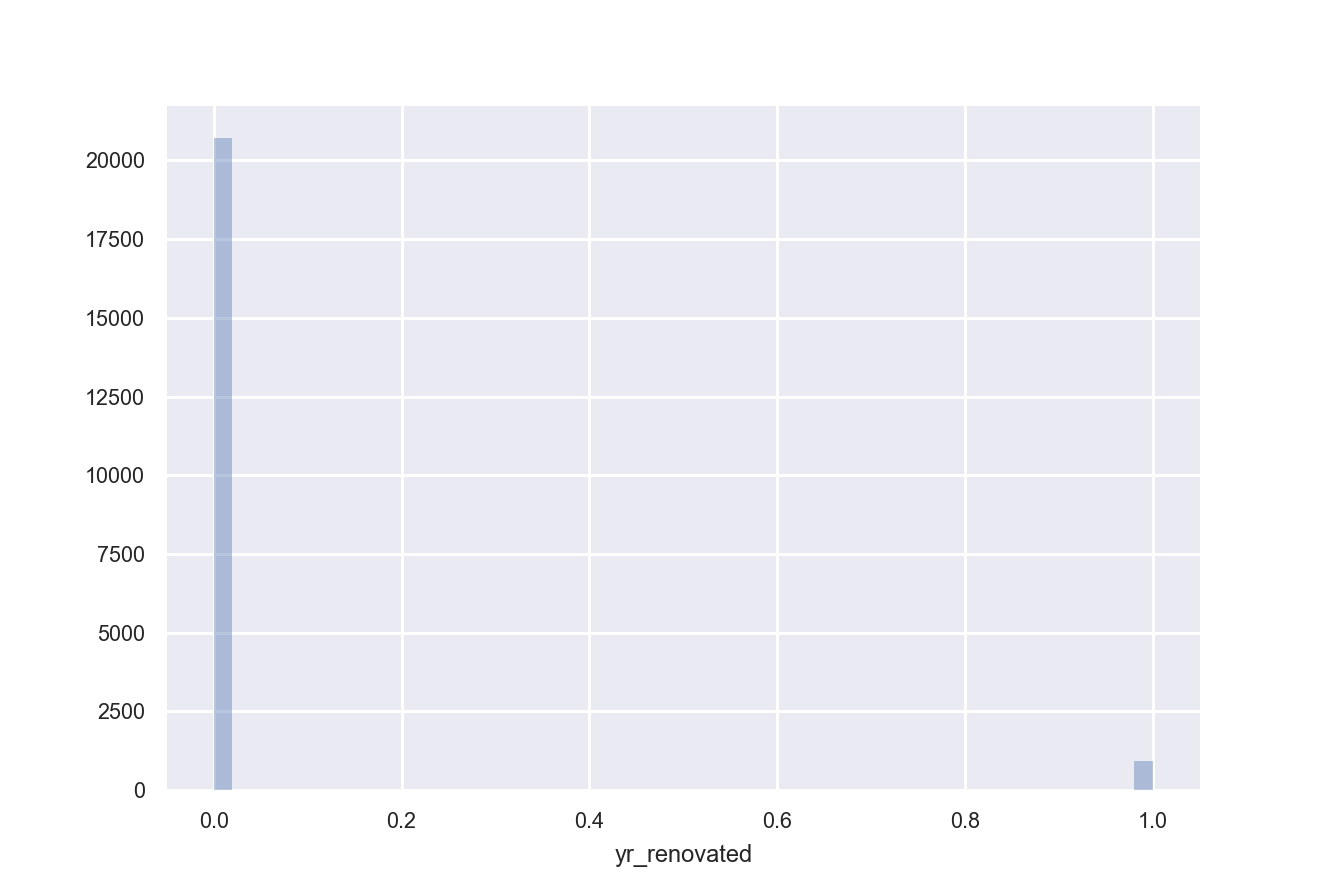

In [153]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(HouseA['yr_renovated'],kde=False)
plt.show()

<IPython.core.display.Javascript object>


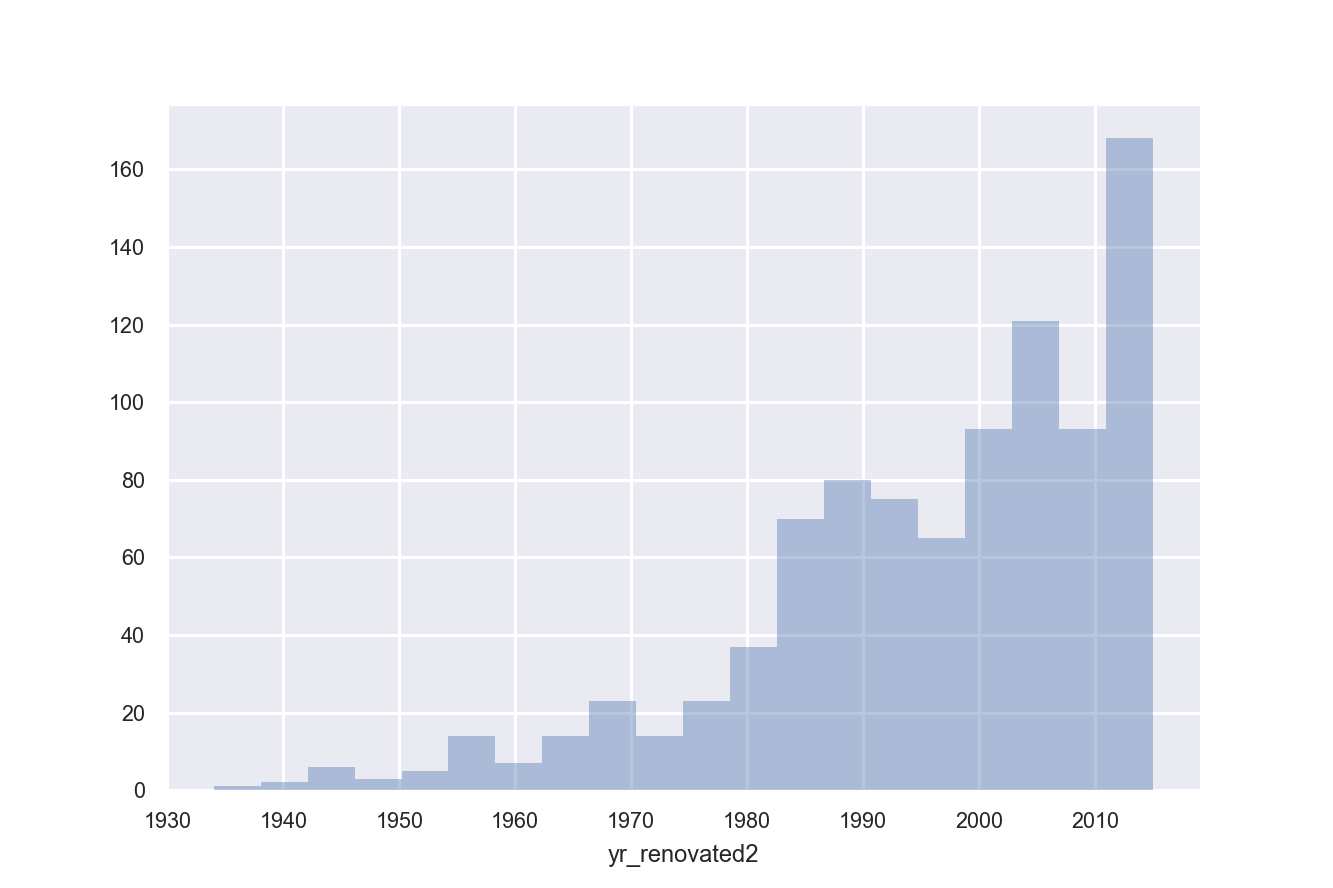

In [154]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(A,kde=False)
plt.show()

<IPython.core.display.Javascript object>


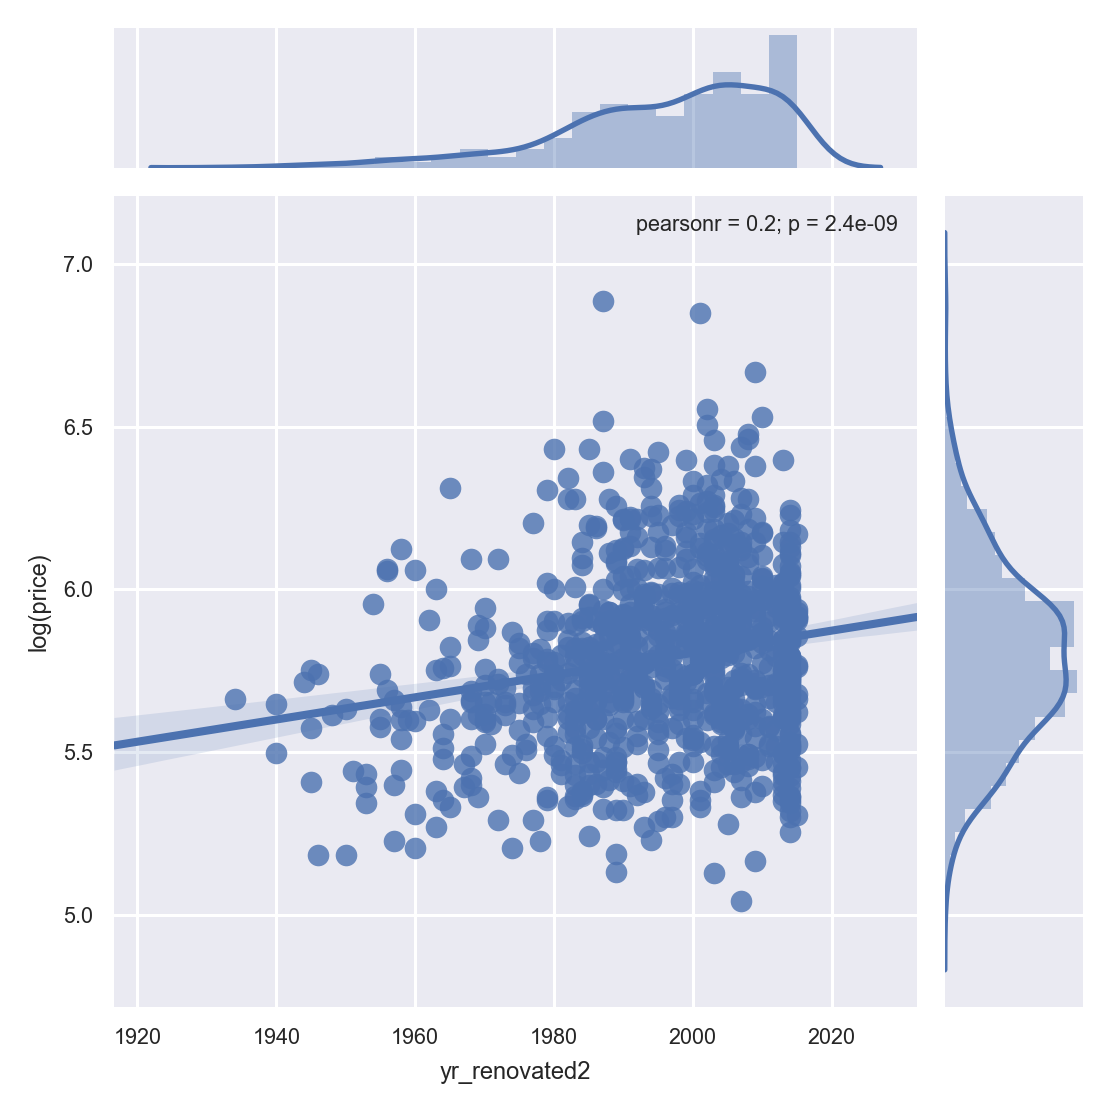

In [155]:
sns.jointplot(x="yr_renovated2", y="log(price)", data=House0, kind = 'reg', dropna=True, size = 5)
plt.show()

In [156]:
# Change None to 1, which means YES in the columns 'yr_renovated'
House0 = House.drop(['date','id'],axis = 1)
House0['price'] = np.log10(House['price'])
#print(House['price'])
#print(House0['price'])
House0.rename(columns={'price':'log(price)'}, inplace=True)

House0['yr_renovated'] = House0['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
House0['yr_renovated'] = House0['yr_renovated'].astype('category',ordered=True)

## * 2. change 'waterfront' as categorical variable

In [157]:
House0['waterfront'] = House0['waterfront'].astype('category',ordered=True)
House0.dtypes

log(price)        float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated     category
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
days_distance       int64
dtype: object

From the histgram above, we can see there are more than 20000 houses renovated, just almost 1000 houses are renovated, however, the number of houses which were renovated was increasing. To deal with Na problem, we just treat it as categorical variable in the regression model.

## * 3. 'bedrooms' and 'sqft_living' outliers

In [158]:
print(House0.index[House0['bedrooms'] > 30])
House1 = House0[House0['bedrooms'] < 30]
House1 = House1[House1['sqft_living']  < 11500]
House1.shape

Int64Index([15870], dtype='int64')


(21610, 20)

In [159]:
House1.head()

log(price)  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0    5.346157         3       1.00         1180      5650     1.0          0   
1    5.730782         3       2.25         2570      7242     2.0          0   
2    5.255273         2       1.00          770     10000     1.0          0   
3    5.781037         4       3.00         1960      5000     1.0          0   
4    5.707570         3       2.00         1680      8080     1.0          0   

   view  condition  grade  sqft_above  sqft_basement  yr_built yr_renovated  \
0     0          3      7        1180              0      1955            0   
1     0          3      7        2170            400      1951            1   
2     0          3      6         770              0      1933            0   
3     0          5      7        1050            910      1965            0   
4     0          3      8        1680              0      1987            0   

   zipcode      lat     long  sqft_living15  sqft_lot15  days_distance  
0    98178  47.5112 -122.257           1340        5650            164  
1    98125  47.7210 -122.319           1690        7639            221  
2    98028  47.7379 -122.233           2720        8062            299  
3    98136  47.5208 -122.393           1360        5000            221  
4    98074  47.6168 -122.045           1800        7503            292

Double-check the scatter plot of 'bedrooms' after removing outliers. The plots look much better

<IPython.core.display.Javascript object>


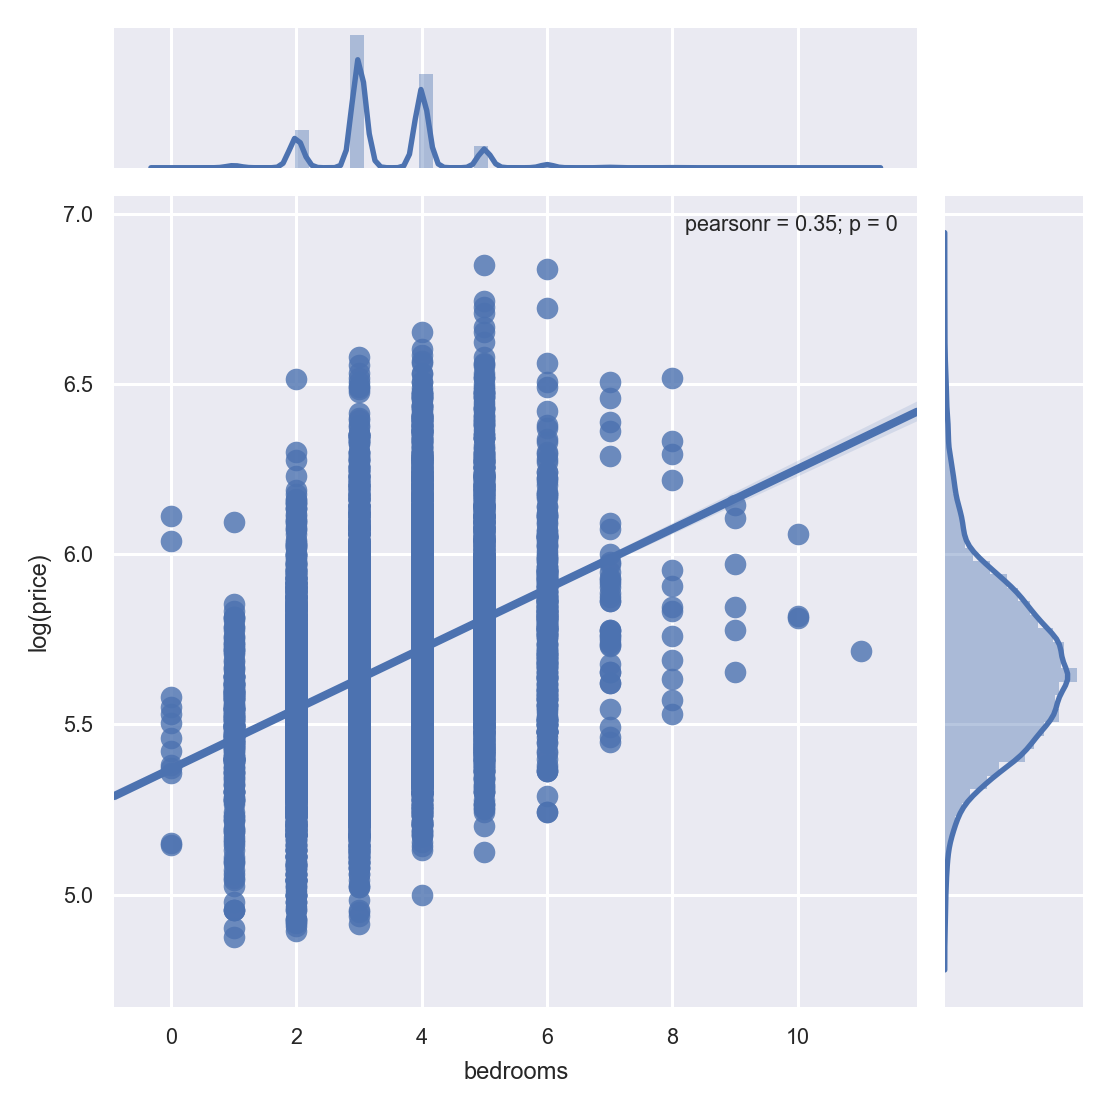

In [160]:
sns.jointplot(x='bedrooms', y="log(price)", data=House1, kind = 'reg', size = 5)
plt.show()

<IPython.core.display.Javascript object>


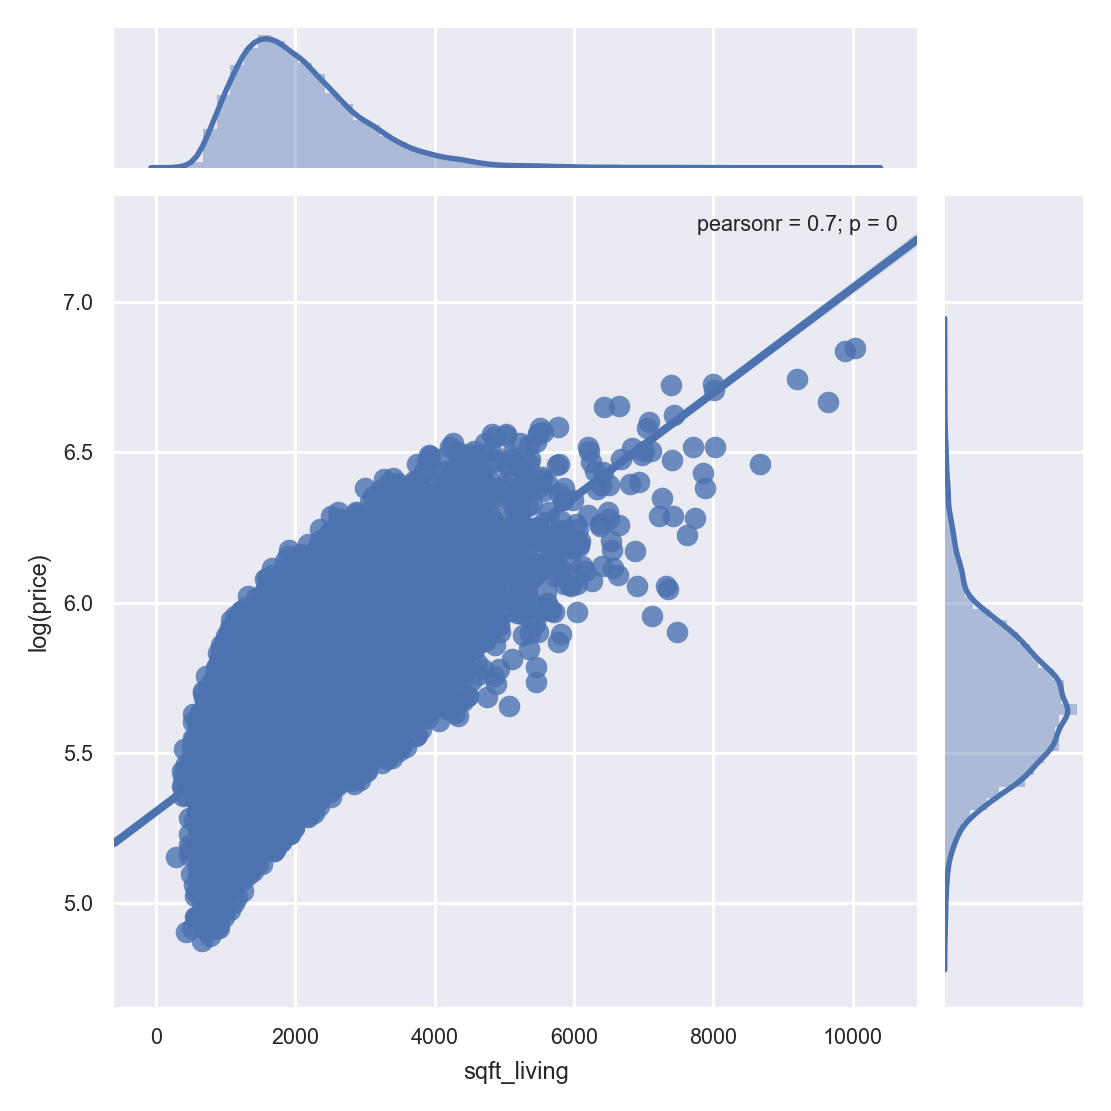

In [161]:
sns.jointplot(x='sqft_living', y="log(price)", data=House1, kind = 'reg', size = 5)
plt.show()

## *4. Skewness on sqft_lot and sqft_lot15

From The comparing between qqplot of sqft_lot VS log(sqft_lot) and qqplot of sqft_lot15 VS log(sqft_lot15) as following, it seems taking logarithm on these two features is a good idea

<IPython.core.display.Javascript object>


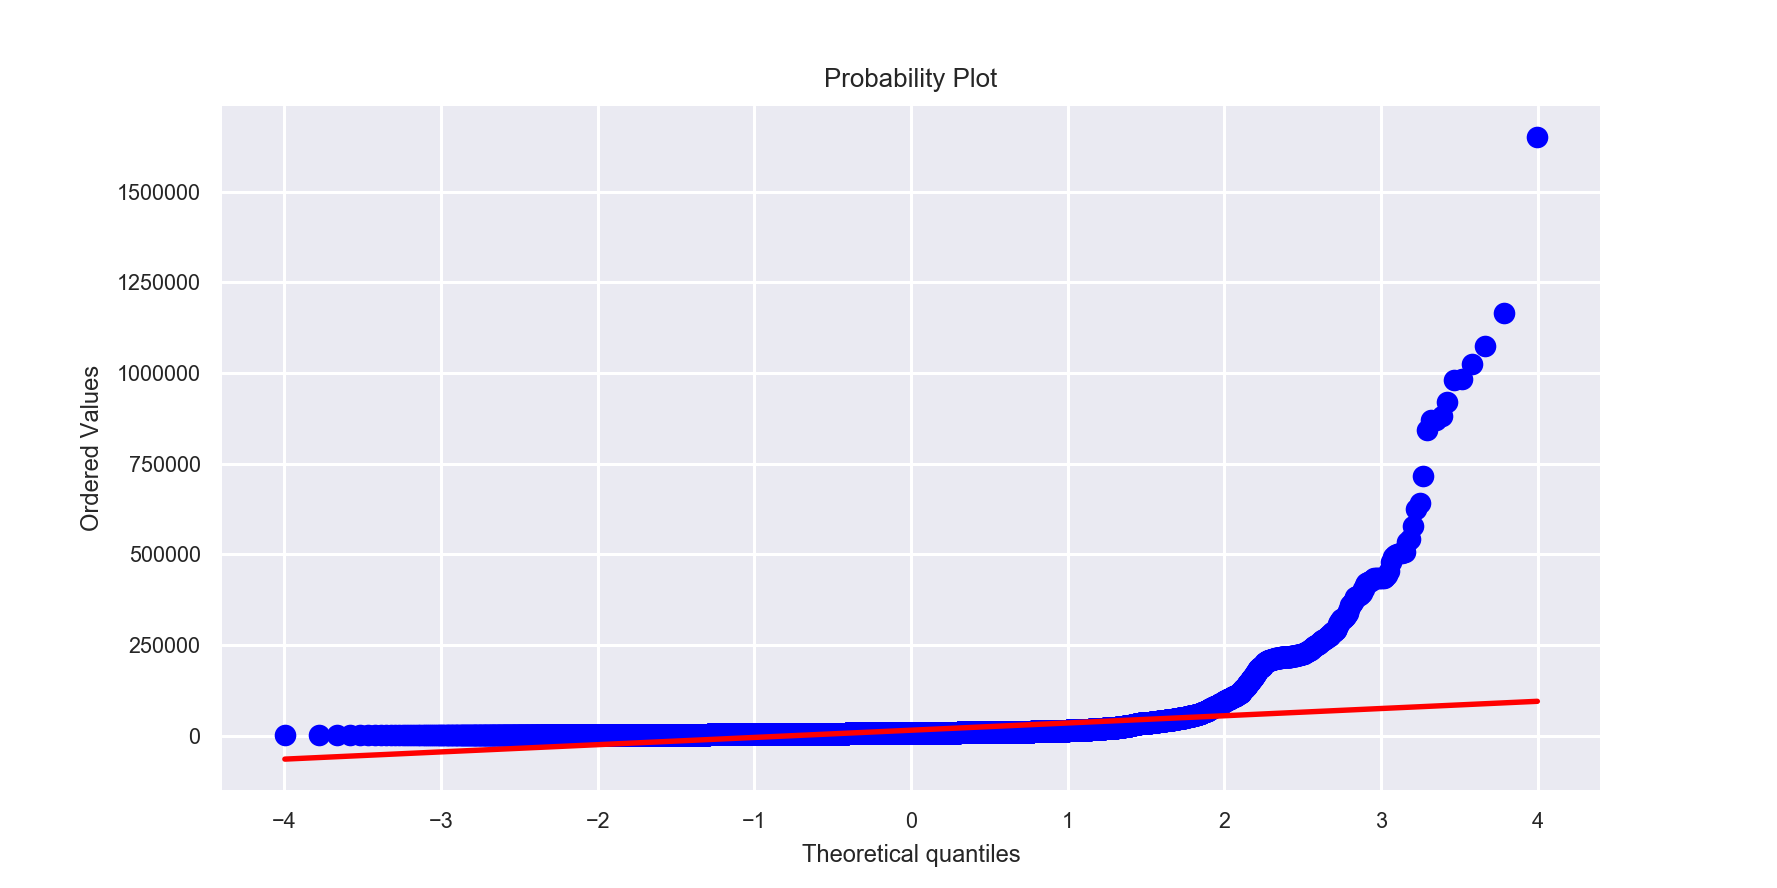

In [162]:
fig, ax = plt.subplots(figsize=(8,4))
scipy.stats.probplot(House1['sqft_lot'], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


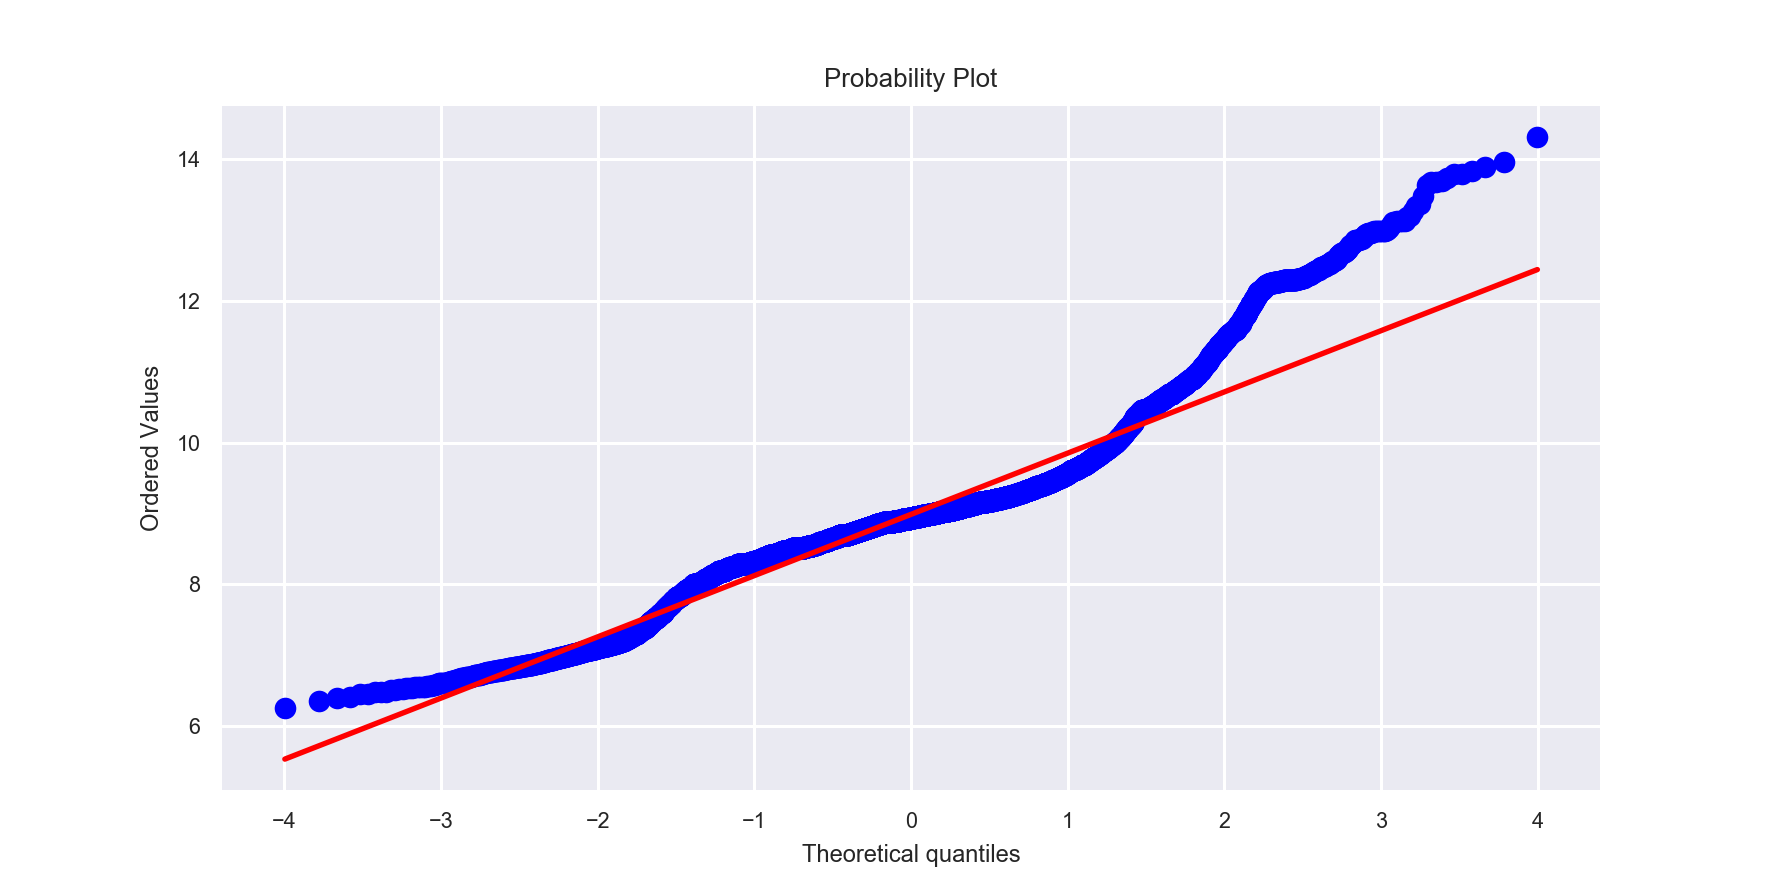

In [163]:
fig, ax = plt.subplots(figsize=(8,4))
Log_lot = House1['sqft_lot'].apply(lambda x: np.log(x))
scipy.stats.probplot(Log_lot, plot=plt)
plt.show()

<IPython.core.display.Javascript object>


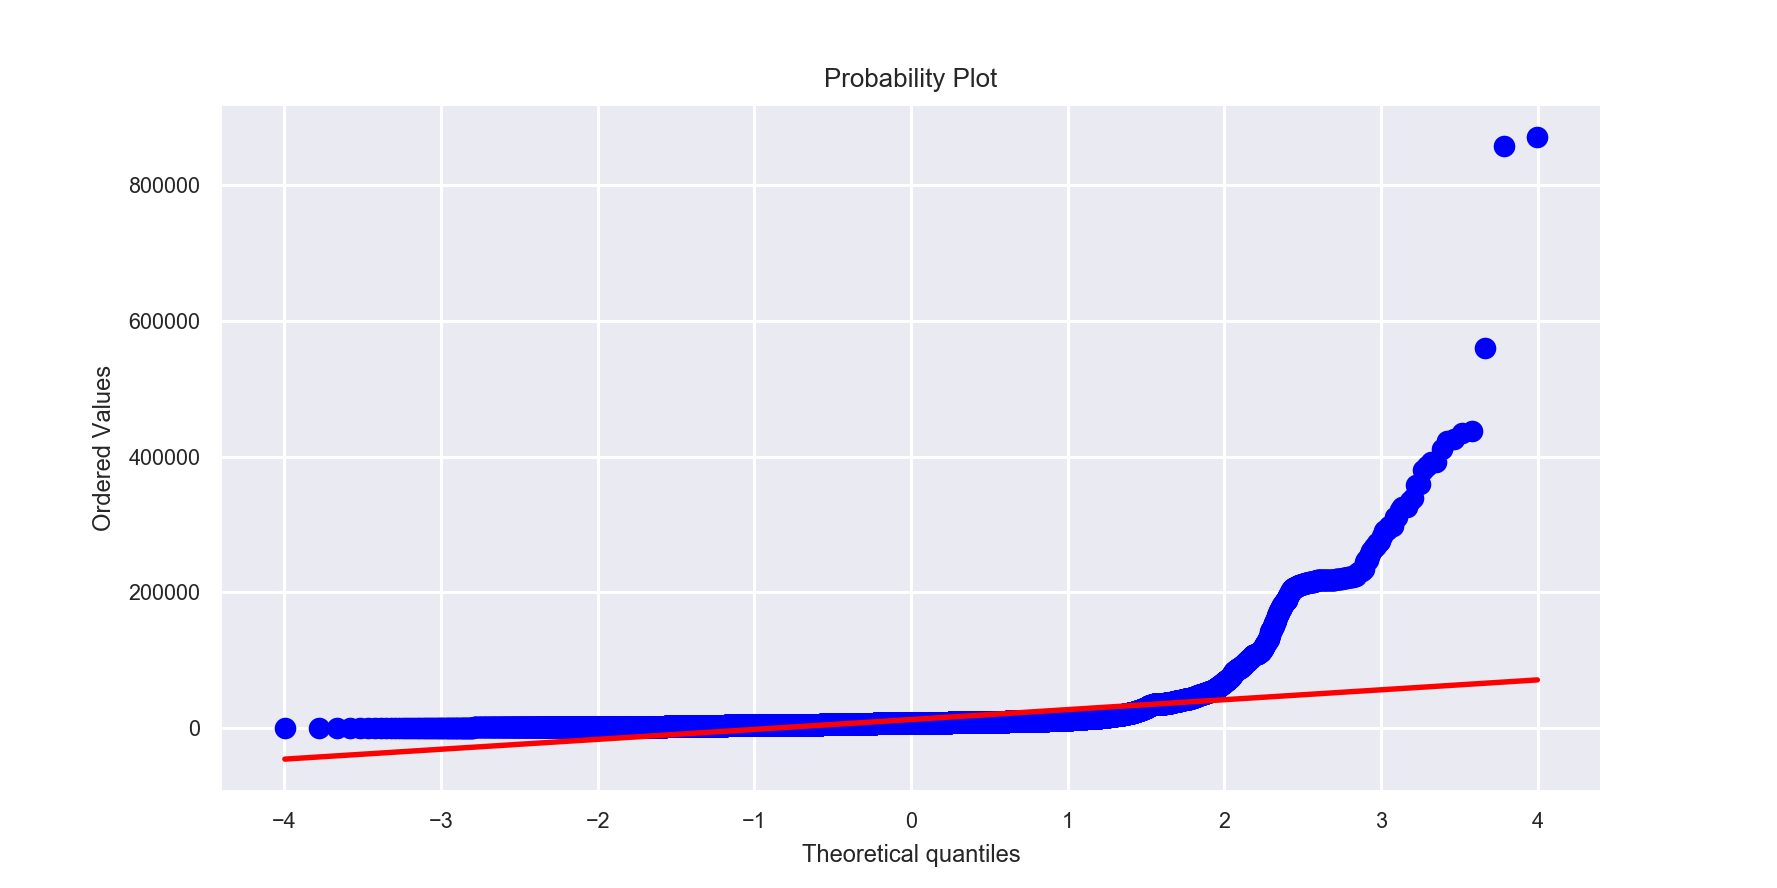

In [164]:
fig, ax = plt.subplots(figsize=(8,4))
scipy.stats.probplot(House1['sqft_lot15'], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


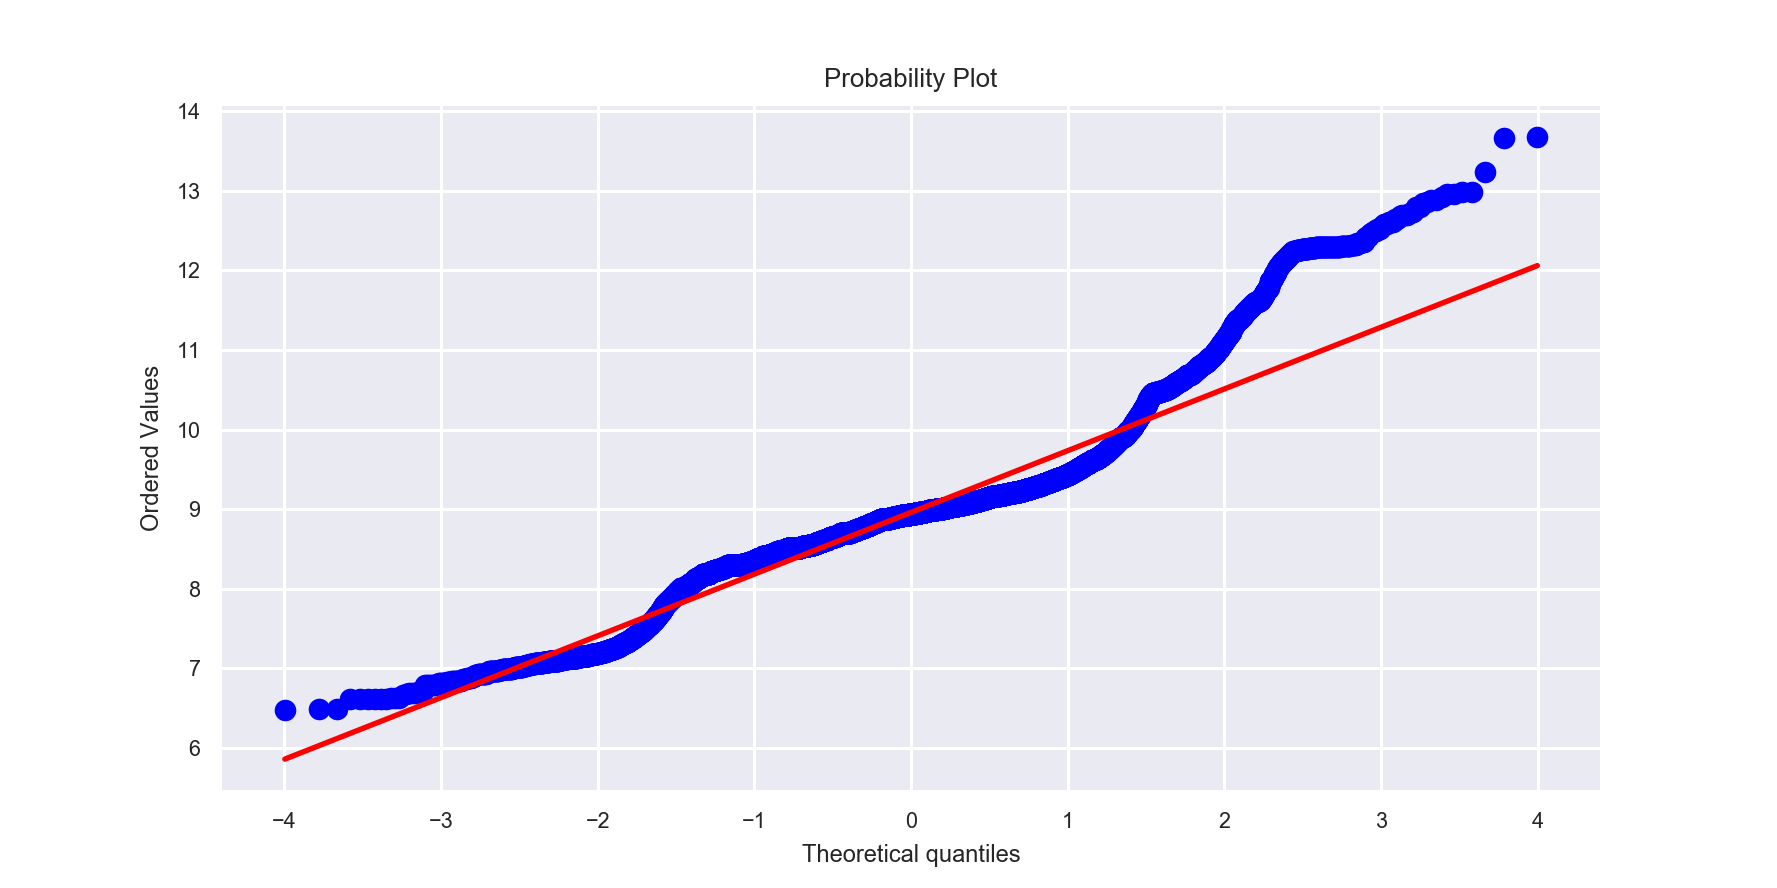

In [165]:
fig, ax = plt.subplots(figsize=(8,4))
Log_lot15 = House1['sqft_lot15'].apply(lambda x: np.log(x))
scipy.stats.probplot(Log_lot15, plot=plt)
plt.show()

In [166]:
House1['log_sqft_lot'] = House1['sqft_lot'].apply(lambda x: np.log(x))
House1['log_sqft_lot15'] = House1['sqft_lot15'].apply(lambda x: np.log(x))

## *5. remove 'zipcode'

In [167]:
House1 = House1.drop(['zipcode','sqft_lot','sqft_lot15'],axis = 1)
House1.dtypes

log(price)         float64
bedrooms             int64
bathrooms          float64
sqft_living          int64
floors             float64
waterfront        category
view                 int64
condition            int64
grade                int64
sqft_above           int64
sqft_basement        int64
yr_built             int64
yr_renovated      category
lat                float64
long               float64
sqft_living15        int64
days_distance        int64
log_sqft_lot       float64
log_sqft_lot15     float64
dtype: object

## *6. Treat 'grade' as numerical or categorical variable?

<IPython.core.display.Javascript object>


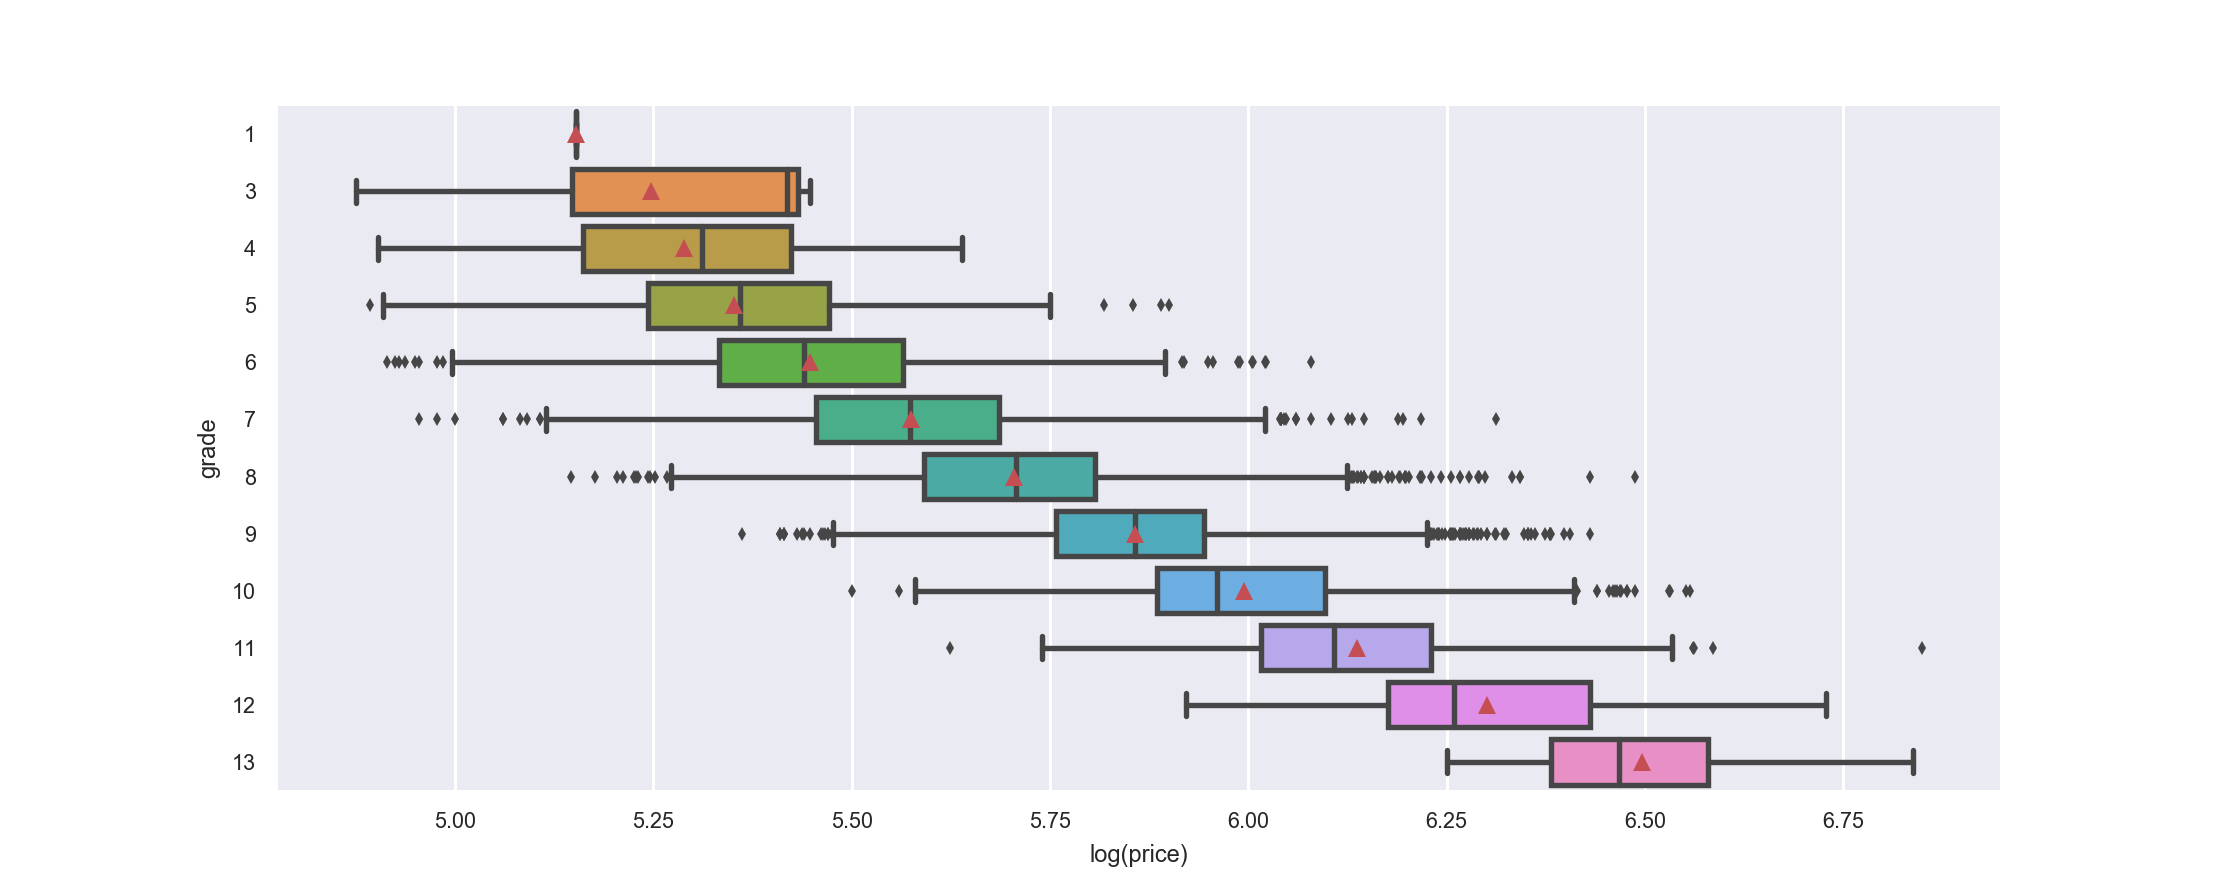

In [168]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(y = 'grade', x = 'log(price)', data = House1,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

From the boxplot above, we prefer to treat grade as numerical variable.

<IPython.core.display.Javascript object>


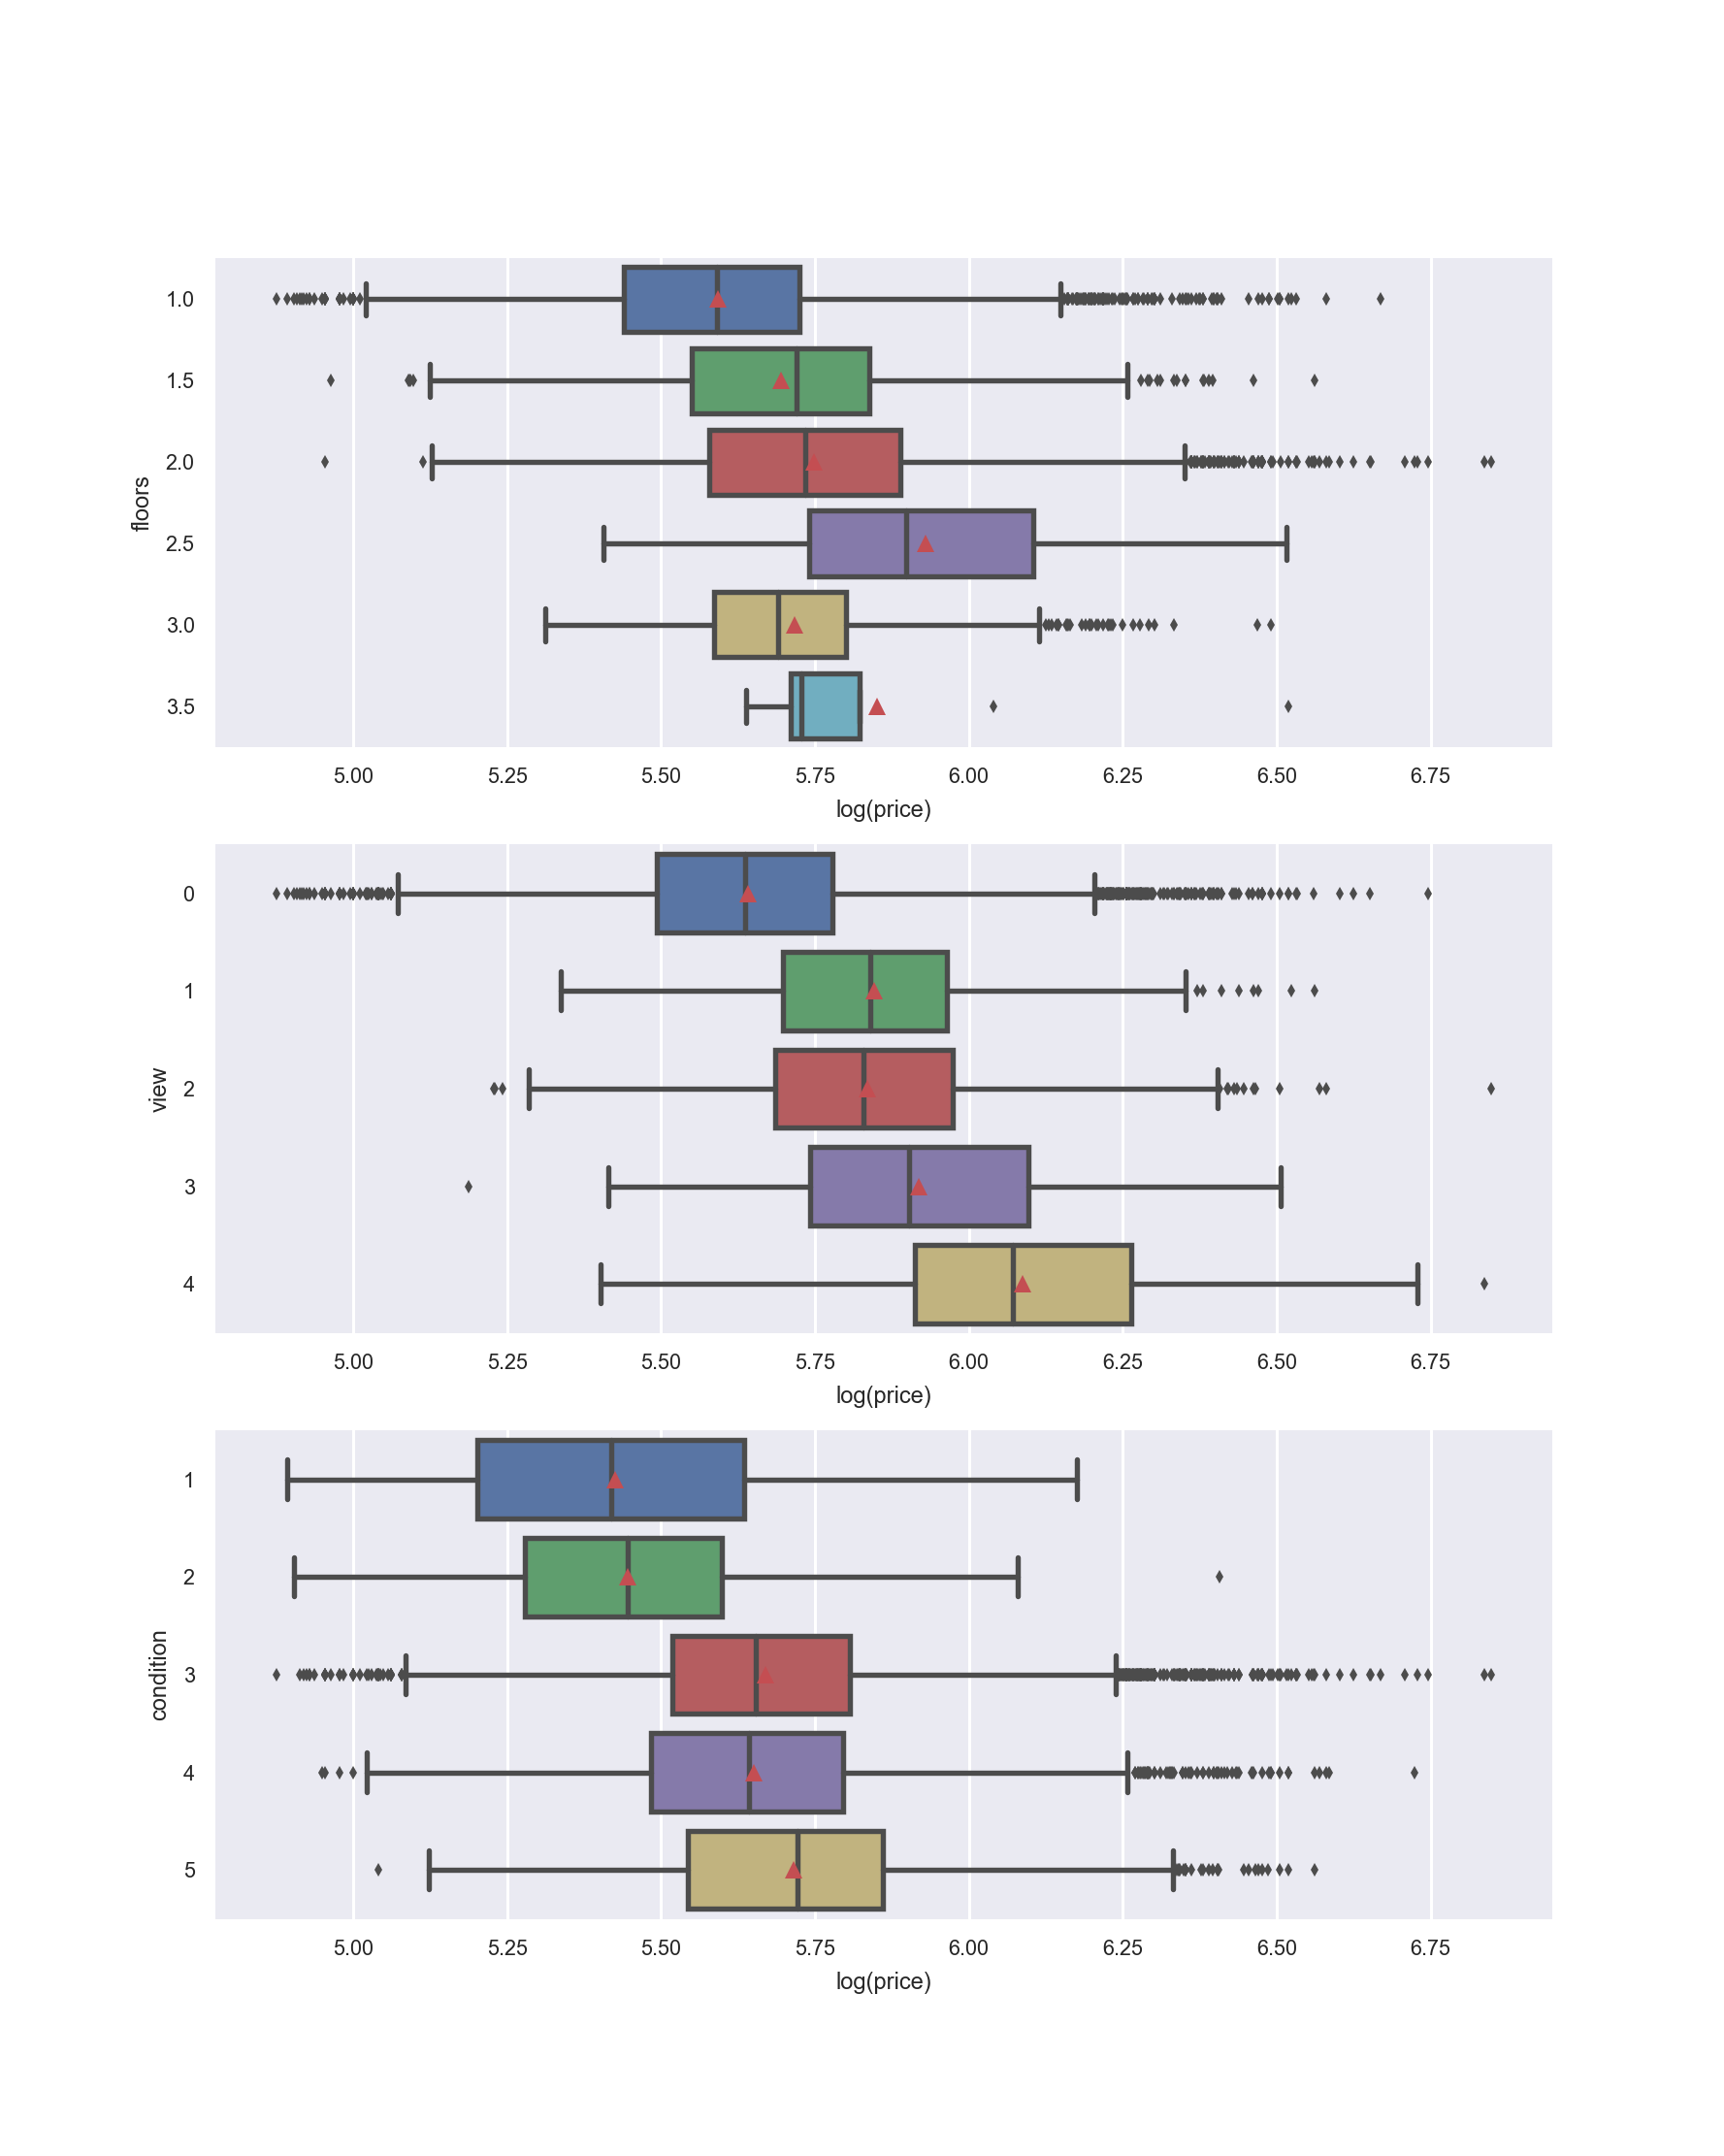

In [169]:
fig, axarr = plt.subplots(3, figsize=(8,10))
sns.boxplot(y = 'floors', x = 'log(price)', data = House1,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'view', x = 'log(price)', data = House1,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'condition', x = 'log(price)', data = House1,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
plt.show()

In [170]:
House2 = House1
House2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 19 columns):
log(price)        21610 non-null float64
bedrooms          21610 non-null int64
bathrooms         21610 non-null float64
sqft_living       21610 non-null int64
floors            21610 non-null float64
waterfront        21610 non-null category
view              21610 non-null int64
condition         21610 non-null int64
grade             21610 non-null int64
sqft_above        21610 non-null int64
sqft_basement     21610 non-null int64
yr_built          21610 non-null int64
yr_renovated      21610 non-null category
lat               21610 non-null float64
long              21610 non-null float64
sqft_living15     21610 non-null int64
days_distance     21610 non-null int64
log_sqft_lot      21610 non-null float64
log_sqft_lot15    21610 non-null float64
dtypes: category(2), float64(7), int64(10)
memory usage: 3.6 MB


## Correlation Heatmap

<IPython.core.display.Javascript object>


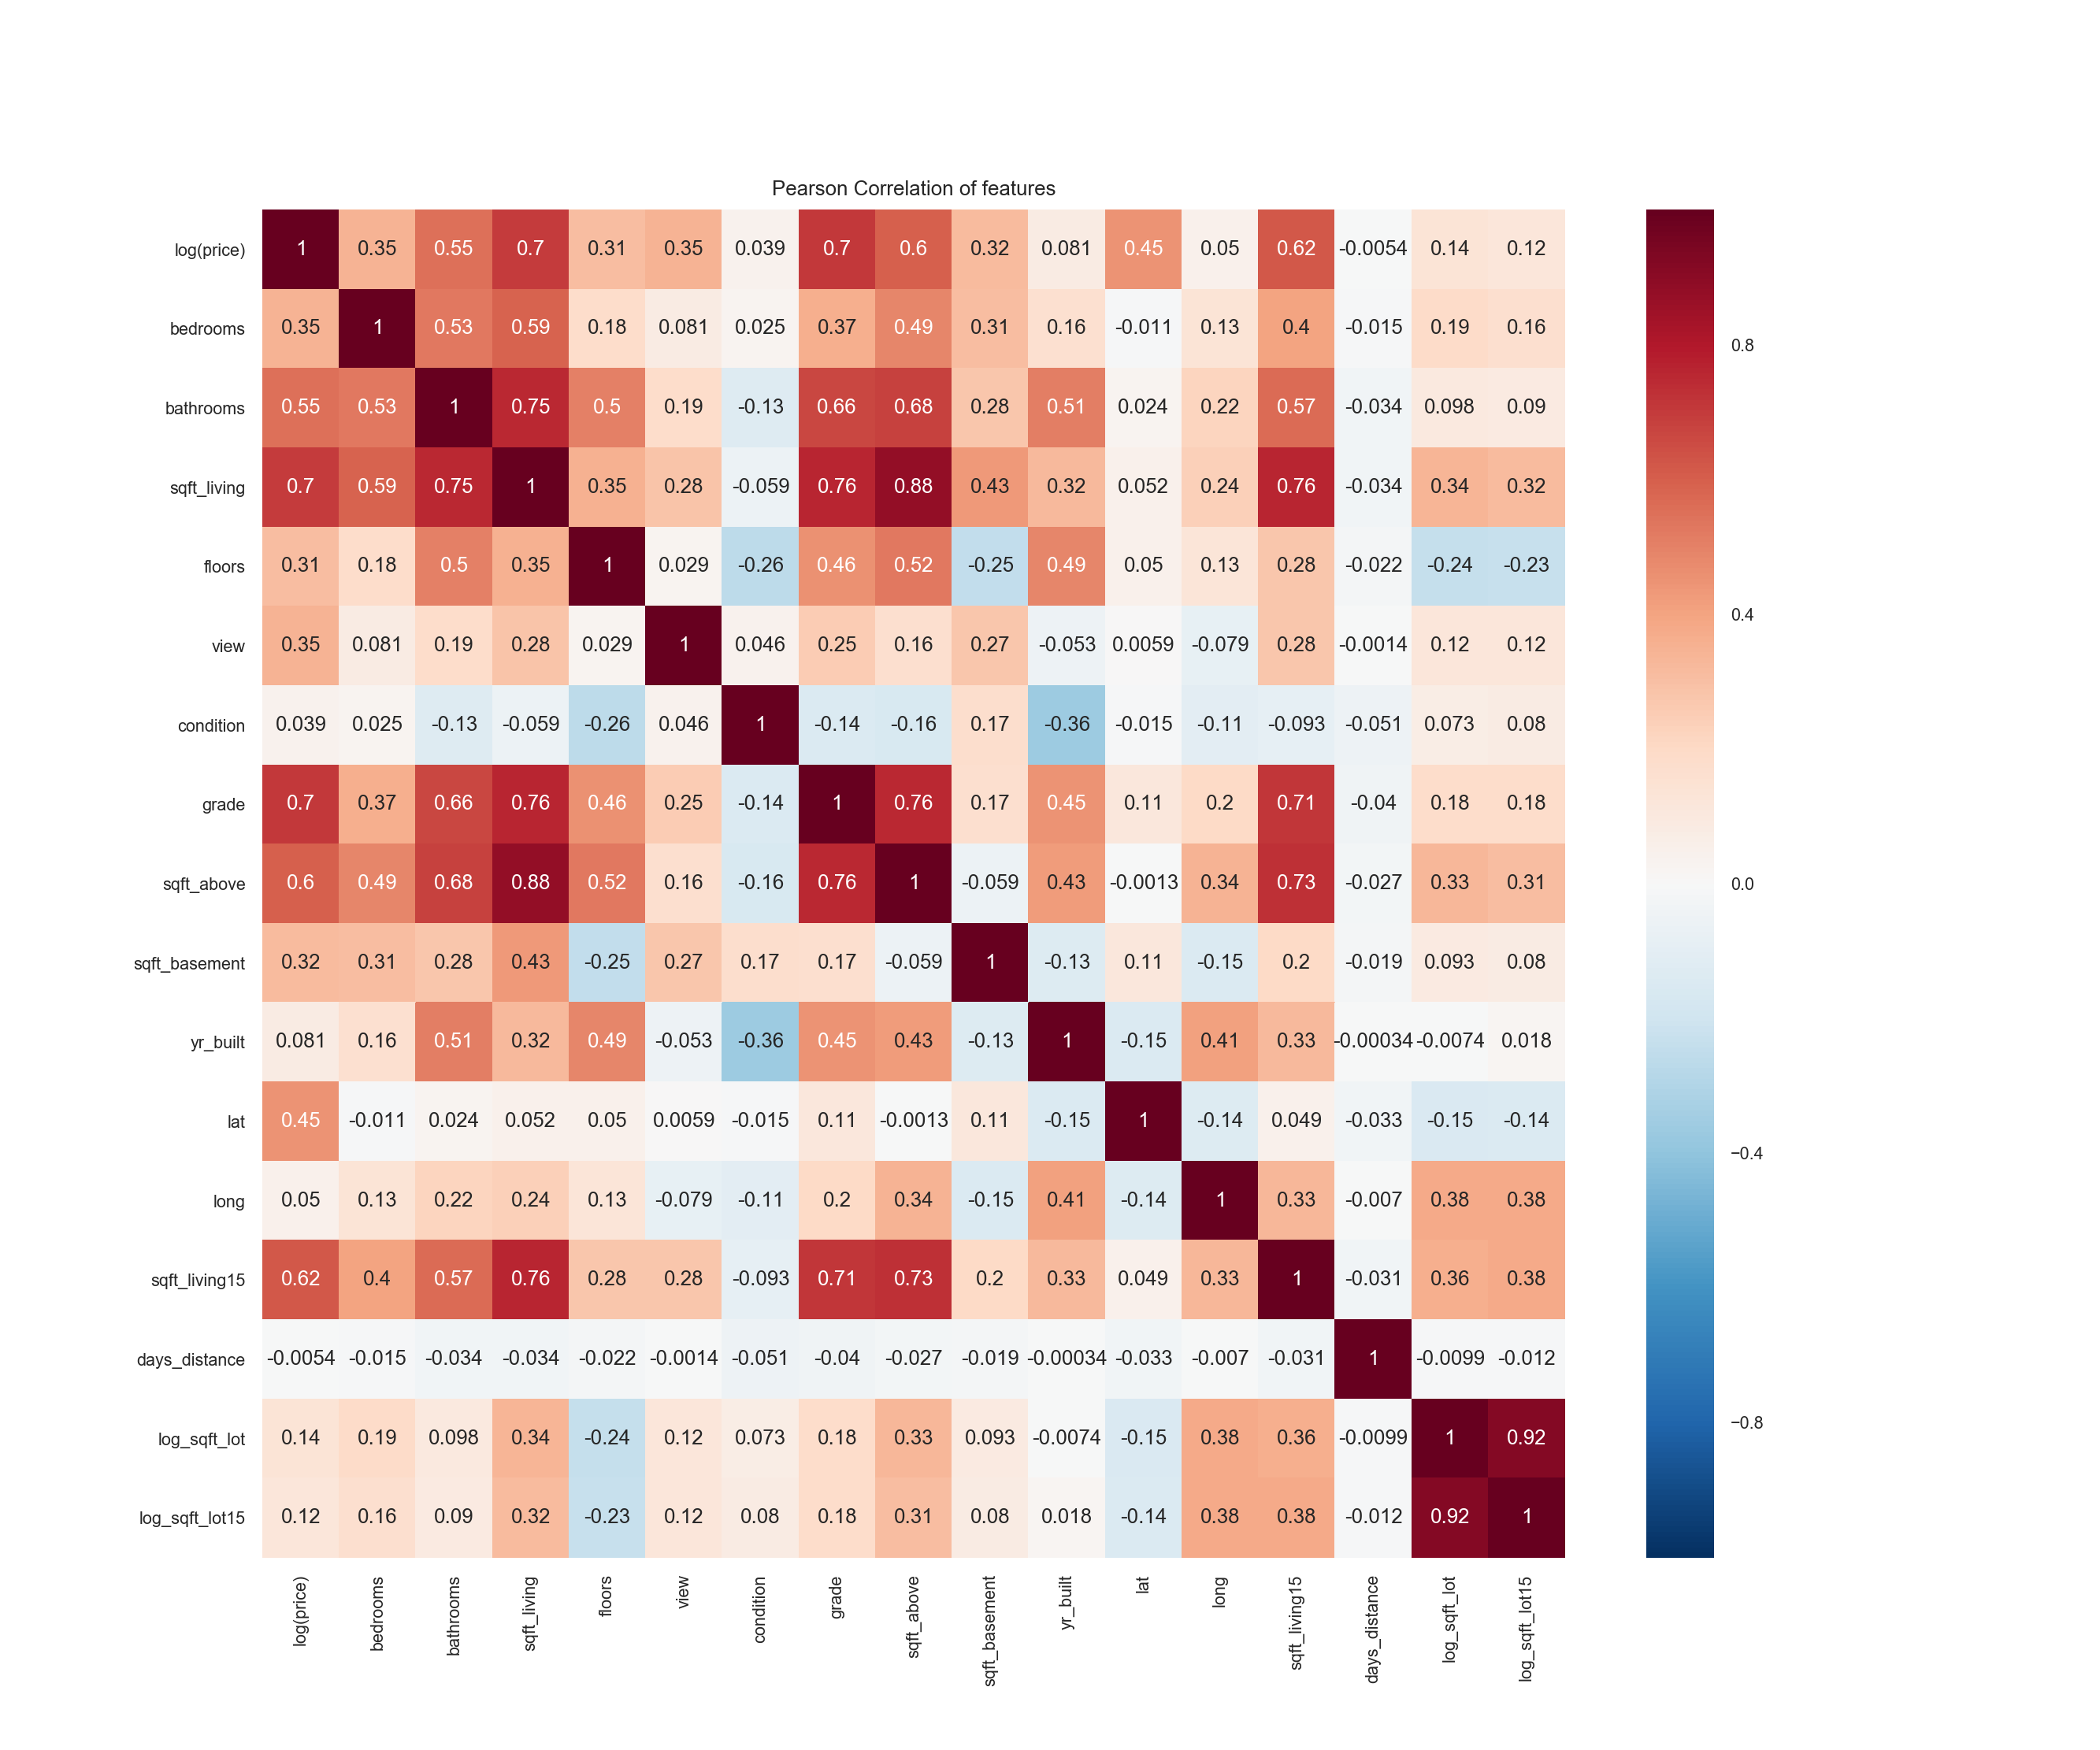

In [171]:
plt.figure(figsize=(12, 10))
plt.title('Pearson Correlation of features')
correlation = House2.corr()
sns.set(font_scale=0.7)
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In the correlation plot shown above:

we had basic correlation relationship between target variable 'log(price)' versis every independent variable. 'sqft_living','grade','sqft_living15','sqft_above','bathrooms' are the top 5 features which were moderately/strongly correlated with 'log(price)'

There are moderately/strong correlation between 'sqft_living','sqft_living15','grade','sqft_above' and 'bathrooms'. 

'sqft_lot' and 'sqft_lot15' are strongly correlated to each other.

## 2.4 Summary of Data Preparation

In section 2, we did exploratory analysis on our house sales dataset. There are 21613 rows and 21 columns with no missing value. After some data visualization steps, we put logarithm transformation on feature 'price', 'sqft_lot' and 'sqft_lot15',removed 'zipcode' variable, transform 'date' feature to 'days_distance' as integer. Besides, we treat 'waterfront' and 'yr_renovated' as categorical. The new dataset will be used to do modeling in secition 3.

In [172]:
House2.to_csv('kc_House_data_after_data_preparation.csv')